## Brazilian Players in the Champions League: A Performance Analysis and Market Value Analysis of Brazilians and Foreign Players

##### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### Data Loading

In [3]:
ple = pd.read_csv('player_valuations')
pl = pd.read_csv('players')
app = pd.read_csv('appearances')
games = pd.read_csv('club_games')
clubs = pd.read_csv('clubs')
competitions = pd.read_csv('competitions')
gamess = pd.read_csv('games')

##### Understanding Data

In [5]:
dataframes = {
    "player_valuations": ple,
    "players": pl,
    "appearances": app,
    "club_games": games,
    "clubs": clubs,
    "competitions": competitions,
    "games": gamess,
}

for name, df in dataframes.items():
    print(f"Head of {name}:")
    print(df.head())
    print("\n" + "-" * 50 + "\n")

Head of player_valuations:
   player_id  last_season             datetime        date    dateweek  \
0       3132         2013  2003-12-09 00:00:00  2003-12-09  2003-12-08   
1       6893         2012  2003-12-15 00:00:00  2003-12-15  2003-12-15   
2         10         2015  2004-10-04 00:00:00  2004-10-04  2004-10-04   
3         26         2017  2004-10-04 00:00:00  2004-10-04  2004-10-04   
4         65         2015  2004-10-04 00:00:00  2004-10-04  2004-10-04   

   market_value_in_eur  n  current_club_id player_club_domestic_competition_id  
0               400000  1              126                                 TR1  
1               900000  1              984                                 GB1  
2              7000000  1              398                                 IT1  
3              1500000  1               16                                  L1  
4              8000000  1             1091                                 GR1  

-----------------------------------------

##### Data Cleaning, Merging and Filtering

In [7]:
#Filtering Champions League Games
gamess_cl = gamess[gamess['competition_id'] == 'CL']
gamess_cl

game_id competition_id  season    round        date  home_club_id  \
191    2262148             CL    2012  Group A  2012-09-18           583   
192    2262191             CL    2012  Group C  2012-10-24          1084   
193    2262198             CL    2012  Group B  2012-11-06           683   
194    2262231             CL    2012  Group C  2012-12-04             5   
195    2262239             CL    2012  Group G  2012-12-05           131   
...        ...            ...     ...      ...         ...           ...   
61285  2755704             CL    2016  Group H  2016-11-02           368   
61381  2917358             CL    2017  Group A  2017-09-12           985   
61401  3461802             CL    2020  Group A  2020-12-01           932   
61406  3651075             CL    2021  Group H  2021-09-29           964   
61413  3911808             CL    2022  Group E  2022-09-14             5   

       away_club_id  home_club_goals  away_club_goals  home_club_position  \
191             338                4                1                  -1   
192               5                1                0                  -1   
193             969                3                1                  -1   
194             964                0                1                  -1   
195             294                0                0                  -1   
...             ...              ...              ...                 ...   
61285           419                4                0                  -1   
61381            26                3                0                  -1   
61401           409                1                3                  -1   
61406           496                4                0                  -1   
61413           419                3                1                  -1   

       ...  home_club_manager_name away_club_manager_name  \
191    ...         Carlo Ancelotti             Yuri Semin   
192    ...       Manuel Pellegrini   Massimiliano Allegri   
193    ...         Leonardo Jardim            René Girard   
194    ...    Massimiliano Allegri      Luciano Spalletti   
195    ...           Tito Vilanova            Jorge Jesus   
...    ...                     ...                    ...   
61285  ...          Jorge Sampaoli           Ivaylo Petev   
61381  ...           José Mourinho          Raphael Wicky   
61401  ...           Marko Nikolic           Jesse Marsch   
61406  ...            Sergey Semak      Jon Dahl Tomasson   
61413  ...           Stefano Pioli             Ante Cacic   

                           stadium attendance                  referee  \
191               Parc des Princes    42536.0            Björn Kuipers   
192                    La Rosaleda    27683.0            Pedro Proença   
193    Stadio Georgios Karaiskakis    28217.0         Marijo Strahonja   
194                Giuseppe Meazza    29508.0             Tony Chapron   
195               Spotify Camp Nou    50659.0        Svein Oddvar Moen   
...                            ...        ...                      ...   
61285        Ramón Sánchez-Pizjuán    35212.0             Felix Zwayer   
61381                 Old Trafford    73854.0             Ruddy Buquet   
61401                    RZD Arena     6759.0            Ali Palabiyik   
61406                Gazprom Arena    15339.0  Anastasios Sidiropoulos   
61413              Giuseppe Meazza    61341.0        Jesús Gil Manzano   

                                                     url  \
191    https://www.transfermarkt.co.uk/spielbericht/i...   
192    https://www.transfermarkt.co.uk/spielbericht/i...   
193    https://www.transfermarkt.co.uk/spielbericht/i...   
194    https://www.transfermarkt.co.uk/spielbericht/i...   
195    https://www.transfermarkt.co.uk/spielbericht/i...   
...                                                  ...   
61285  https://www.transfermarkt.co.uk/spielbericht/i...   
61381  https://www.transfermarkt.co.uk/spielbericht/i...   
61401  

In [8]:
# Dropping unnecessary columns
gamess_cl = gamess_cl.drop(['competition_id', 'home_club_position', 'away_club_position', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url', 'competition_type', 'aggregate'], axis=1)

In [9]:
# Checking Null values
gamess_cl.isnull().sum()

game_id              0
season               0
round                0
date                 0
home_club_id         0
away_club_id         0
home_club_goals      0
away_club_goals      0
home_club_name     137
away_club_name     137
dtype: int64

In [10]:
# Dropping null values
gamess_cl.dropna(subset=['home_club_name','away_club_name'], inplace=True)

In [11]:
gamess_cl

game_id  season                   round        date  home_club_id  \
191    2262148    2012                 Group A  2012-09-18           583   
193    2262198    2012                 Group B  2012-11-06           683   
194    2262231    2012                 Group C  2012-12-04             5   
195    2262239    2012                 Group G  2012-12-05           131   
210    2284445    2012         last 16 2nd leg  2013-03-13            27   
...        ...     ...                     ...         ...           ...   
60061  3097997    2018                 Group B  2018-10-24           383   
60748  3167766    2018  Quarter-Finals 2nd leg  2019-04-17           281   
60800  2618568    2015                 Group B  2015-09-30          2410   
60922  2754921    2016                 Group D  2016-10-19            27   
61066  2645819    2015         last 16 2nd leg  2016-03-15            13   

       away_club_id  home_club_goals  away_club_goals       home_club_name  \
191             338                4                1  Paris Saint-Germain   
193             969                3                1   Olympiacos Piraeus   
194             964                0                1             AC Milan   
195             294                0                0         FC Barcelona   
210              11                0                2        Bayern Munich   
...             ...              ...              ...                  ...   
60061           148                2                2        PSV Eindhoven   
60748           148                4                3      Manchester City   
60800           383                3                2          CSKA Moscow   
60922           383                4                1        Bayern Munich   
61066           383                8                7   Atlético de Madrid   

             away_club_name  
191             Dynamo Kyiv  
193         Montpellier HSC  
194    Zenit St. Petersburg  
195              SL Benfica  
210              Arsenal FC  
...                     ...  
60061     Tottenham Hotspur  
60748     Tottenham Hotspur  
60800         PSV Eindhoven  
60922         PSV Eindhoven  
61066         PSV Eindhoven  

[1094 rows x 10 columns]

In [12]:
# Filtering Champions League Appearances
app_cl = app[(app['competition_id'] == 'CL')]
app_cl

appearance_id  game_id  player_id  player_club_id  \
29882    2490842_121404  2490842     121404             683   
29883    2490842_121483  2490842     121483              13   
29884    2490842_125781  2490842     125781              13   
29885    2490842_130108  2490842     130108             683   
29886    2490842_148928  2490842     148928              13   
...                 ...      ...        ...             ...   
1162908   4041603_48859  4041603      48859               5   
1162909  4041603_502670  4041603     502670            6195   
1162910  4041603_503482  4041603     503482            6195   
1162911   4041603_82442  4041603      82442               5   
1162912   4041603_87884  4041603      87884            6195   

         player_current_club_id        date            player_name  \
29882                       141  2014-09-16      Omar Elabdellaoui   
29883                        13  2014-09-16              Jan Oblak   
29884                        13  2014-09-16      Antoine Griezmann   
29885                       683  2014-09-16          Pajtim Kasami   
29886                        13  2014-09-16            Saúl Ñíguez   
...                         ...         ...                    ...   
1162908                       5  2023-04-12            Simon Kjaer   
1162909                    6195  2023-04-12  Khvicha Kvaratskhelia   
1162910                    6195  2023-04-12            Min-jae Kim   
1162911                       5  2023-04-12         Olivier Giroud   
1162912                    6195  2023-04-12              Mário Rui   

        competition_id  yellow_cards  red_cards  goals  assists  \
29882               CL             0          0      0        0   
29883               CL             0          0      0        0   
29884               CL             1          0      1        0   
29885               CL             0          0      0        1   
29886               CL             1          0      0        0   
...                ...           ...        ...    ...      ...   
1162908             CL             0          0      0        0   
1162909             CL             0          0      0        0   
1162910             CL             1          0      0        0   
1162911             CL             0          0      0        0   
1162912             CL             0          0      0        0   

         minutes_played  
29882                90  
29883                90  
29884                34  
29885                84  
29886                15  
...                 ...  
1162908              90  
1162909              81  
1162910              90  
1162911              90  
1162912              81  

[28558 rows x 13 columns]

##### Merging CL appearance and CL games

In [14]:
merged_df = pd.merge(
    app_cl,
    gamess_cl,
    on="game_id", 
    how="inner"     
)

In [15]:
merged_cl_df = merged_df.rename(columns={
    "date_x": "appearance_date",
    "date_y": "match_date"
})         

In [16]:
merged_cl_df

appearance_id  game_id  player_id  player_club_id  \
0      2490842_121404  2490842     121404             683   
1      2490842_121483  2490842     121483              13   
2      2490842_125781  2490842     125781              13   
3      2490842_130108  2490842     130108             683   
4      2490842_148928  2490842     148928              13   
...               ...      ...        ...             ...   
25354   4041603_48859  4041603      48859               5   
25355  4041603_502670  4041603     502670            6195   
25356  4041603_503482  4041603     503482            6195   
25357   4041603_82442  4041603      82442               5   
25358   4041603_87884  4041603      87884            6195   

       player_current_club_id appearance_date            player_name  \
0                         141      2014-09-16      Omar Elabdellaoui   
1                          13      2014-09-16              Jan Oblak   
2                          13      2014-09-16      Antoine Griezmann   
3                         683      2014-09-16          Pajtim Kasami   
4                          13      2014-09-16            Saúl Ñíguez   
...                       ...             ...                    ...   
25354                       5      2023-04-12            Simon Kjaer   
25355                    6195      2023-04-12  Khvicha Kvaratskhelia   
25356                    6195      2023-04-12            Min-jae Kim   
25357                       5      2023-04-12         Olivier Giroud   
25358                    6195      2023-04-12              Mário Rui   

      competition_id  yellow_cards  red_cards  ...  minutes_played  season  \
0                 CL             0          0  ...              90    2014   
1                 CL             0          0  ...              90    2014   
2                 CL             1          0  ...              34    2014   
3                 CL             0          0  ...              84    2014   
4                 CL             1          0  ...              15    2014   
...              ...           ...        ...  ...             ...     ...   
25354             CL             0          0  ...              90    2022   
25355             CL             0          0  ...              81    2022   
25356             CL             1          0  ...              90    2022   
25357             CL             0          0  ...              90    2022   
25358             CL             0          0  ...              81    2022   

                        round  match_date home_club_id away_club_id  \
0                     Group A  2014-09-16          683           13   
1                     Group A  2014-09-16          683           13   
2                     Group A  2014-09-16          683           13   
3                     Group A  2014-09-16          683           13   
4                     Group A  2014-09-16          683           13   
...                       ...         ...          ...          ...   
25354  Quarter-Finals 1st leg  2023-04-12            5         6195   
25355  Quarter-Finals 1st leg  2023-04-12            5         6195   
25356  Quarter-Finals 1st leg  2023-04-12            5         6195   
25357  Quarter-Finals 1st leg  2023-04-12            5         6195   
25358  Quarter-Finals 1st leg  2023-04-12            5         6195   

       home_club_goals  away_club_goals      home_club_name  \
0                    3                2  Olympiacos Piraeus   
1                    3                2  Olympiacos Piraeus   
2                    3                2  Olympiacos Piraeus   
3                    3                2  Olympiacos Piraeus   
4                    3                2  Olympiacos Piraeus   
...                ...              ...                 ...   
25354                1                0            AC Milan   
25355                1                0            AC Milan   
25356                1                0            AC

In [17]:
pl

player_id      first_name    last_name                 name  \
0            597       Aleksandr         Hleb       Aleksandr Hleb   
1           1428            Mike        Hanke           Mike Hanke   
2           1560         Youssef  El Akchaoui  Youssef El Akchaoui   
3           1587           Mario     Eggimann       Mario Eggimann   
4           1726           Heiko   Westermann     Heiko Westermann   
...          ...             ...          ...                  ...   
28454     199337           Rifat        Erdem          Rifat Erdem   
28455     209569         Mücahit       Atalay       Mücahit Atalay   
28456     221118  Patrick Friday          Eze   Patrick Friday Eze   
28457     273053           Burak        Saban          Burak Saban   
28458     621911           Ekrem    Kayilibal      Ekrem Kayilibal   

       last_season  current_club_id          player_code country_of_birth  \
0             2016             2696       aleksandr-hleb            UdSSR   
1             2013               60           mike-hanke          Germany   
2             2012              306  youssef-el-akchaoui      Netherlands   
3             2012               42       mario-eggimann      Switzerland   
4             2016              610     heiko-westermann          Germany   
...            ...              ...                  ...              ...   
28454         2013             2293          rifat-erdem           Turkey   
28455         2020             2293       mucahit-atalay           Turkey   
28456         2017             2293   patrick-friday-eze          Nigeria   
28457         2018             2293          burak-saban      Netherlands   
28458         2021             2293      ekrem-kayilibal           Turkey   

      city_of_birth country_of_citizenship  ...   foot height_in_cm  \
0             Minsk                Belarus  ...    NaN          NaN   
1              Hamm                Germany  ...  right        185.0   
2         Dordrecht                Morocco  ...    NaN          NaN   
3             Brugg            Switzerland  ...  right        190.0   
4           Alzenau                Germany  ...  right        190.0   
...             ...                    ...  ...    ...          ...   
28454         Konya                 Turkey  ...  right          NaN   
28455       Trabzon                 Turkey  ...  right        186.0   
28456        Kaduna                Nigeria  ...  right        187.0   
28457         Hoorn            Netherlands  ...   both        177.0   
28458         Konya                 Turkey  ...   both        176.0   

      market_value_in_eur highest_market_value_in_eur  \
0                     NaN                  19000000.0   
1                     NaN                   5000000.0   
2                     NaN                   1750000.0   
3                     NaN                   3000000.0   
4                     NaN                   9000000.0   
...                   ...                         ...   
28454                 NaN                    100000.0   
28455                 NaN                    250000.0   
28456            200000.0                    775000.0   
28457                 NaN                    200000.0   
28458             50000.0                    100000.0   

       contract_expiration_date       agent_name  \
0                           NaN  fair-sport GmbH   
1                           NaN              NaN   
2                           NaN              NaN   
3                           NaN              NaN   
4                           NaN              NaN   
...                         ...              ...   
28454                       NaN              NaN   
28455       2023-06-30 00:00:00              NaN   
28456       2023-06-30 00:00:00              NaN   
28457                       NaN              NaN   
28458       2024-06-30 00:00:00              NaN   

                                               image_url  \
0      https://img

In [18]:
# Dropping unnecessary columns
pl = pl.drop(['url', 'image_url', 'contract_expiration_date', 'height_in_cm', 'city_of_birth', 'sub_position', 'country_of_birth', 'last_name', 'first_name', 'player_code', 'agent_name', 'current_club_domestic_competition_id'], axis=1)

In [19]:
# Renaming columns for readability
pl = pl.rename(columns={
    "country_of_citizenship": "nationality",
    "current_club_name": "club_name"
})
pl

player_id                 name  last_season  current_club_id  \
0            597       Aleksandr Hleb         2016             2696   
1           1428           Mike Hanke         2013               60   
2           1560  Youssef El Akchaoui         2012              306   
3           1587       Mario Eggimann         2012               42   
4           1726     Heiko Westermann         2016              610   
...          ...                  ...          ...              ...   
28454     199337          Rifat Erdem         2013             2293   
28455     209569       Mücahit Atalay         2020             2293   
28456     221118   Patrick Friday Eze         2017             2293   
28457     273053          Burak Saban         2018             2293   
28458     621911      Ekrem Kayilibal         2021             2293   

       nationality date_of_birth    position   foot  market_value_in_eur  \
0          Belarus    1981-05-01    Midfield    NaN                  NaN   
1          Germany    1983-11-05      Attack  right                  NaN   
2          Morocco    1981-02-18    Defender    NaN                  NaN   
3      Switzerland           NaN    Defender  right                  NaN   
4          Germany    1983-08-14    Defender  right                  NaN   
...            ...           ...         ...    ...                  ...   
28454       Turkey    1990-02-28    Defender  right                  NaN   
28455       Turkey    1991-10-26  Goalkeeper  right                  NaN   
28456      Nigeria    1992-12-22      Attack  right             200000.0   
28457  Netherlands    1994-04-20      Attack   both                  NaN   
28458       Turkey    1999-09-22      Attack   both              50000.0   

       highest_market_value_in_eur              club_name  
0                       19000000.0  Krylya Sovetov Samara  
1                        5000000.0            SC Freiburg  
2                        1750000.0          SC Heerenveen  
3                        3000000.0                    NaN  
4                        9000000.0         Ajax Amsterdam  
...                            ...                    ...  
28454                     100000.0              Konyaspor  
28455                     250000.0              Konyaspor  
28456                     775000.0              Konyaspor  
28457                     200000.0              Konyaspor  
28458                     100000.0              Konyaspor  

[28459 rows x 11 columns]

In [20]:
# Filtering player's nationality
pl_nat = pl[['player_id', 'nationality']]
pl_nat

player_id  nationality
0            597      Belarus
1           1428      Germany
2           1560      Morocco
3           1587  Switzerland
4           1726      Germany
...          ...          ...
28454     199337       Turkey
28455     209569       Turkey
28456     221118      Nigeria
28457     273053  Netherlands
28458     621911       Turkey

[28459 rows x 2 columns]

In [22]:
ple

player_id  last_season             datetime        date    dateweek  \
0            3132         2013  2003-12-09 00:00:00  2003-12-09  2003-12-08   
1            6893         2012  2003-12-15 00:00:00  2003-12-15  2003-12-15   
2              10         2015  2004-10-04 00:00:00  2004-10-04  2004-10-04   
3              26         2017  2004-10-04 00:00:00  2004-10-04  2004-10-04   
4              65         2015  2004-10-04 00:00:00  2004-10-04  2004-10-04   
...           ...          ...                  ...         ...         ...   
424318     158071         2015  2023-05-17 00:00:00  2023-05-17  2023-05-15   
424319     187191         2016  2023-05-17 00:00:00  2023-05-17  2023-05-15   
424320     279110         2015  2023-05-17 00:00:00  2023-05-17  2023-05-15   
424321     863829         2022  2023-05-17 00:00:00  2023-05-17  2023-05-15   
424322     405676         2018  2023-12-19 00:00:00  2023-12-19  2023-12-18   

        market_value_in_eur  n  current_club_id  \
0                    400000  1              126   
1                    900000  1              984   
2                   7000000  1              398   
3                   1500000  1               16   
4                   8000000  1             1091   
...                     ... ..              ...   
424318               250000  1             2448   
424319               400000  1              192   
424320               250000  1             1533   
424321               100000  1             2414   
424322                50000  1            23826   

       player_club_domestic_competition_id  
0                                      TR1  
1                                      GB1  
2                                      IT1  
3                                       L1  
4                                      GR1  
...                                    ...  
424318                                 ES1  
424319                                 NL1  
424320                                 ES1  
424321                                 DK1  
424322                                  L1  

[424323 rows x 9 columns]

In [25]:
# Dropping unnecessary columns
ple = ple.drop(['datetime', 'n', 'player_club_domestic_competition_id', 'current_club_id', 'last_season'], axis=1)
ple

player_id        date    dateweek  market_value_in_eur
0            3132  2003-12-09  2003-12-08               400000
1            6893  2003-12-15  2003-12-15               900000
2              10  2004-10-04  2004-10-04              7000000
3              26  2004-10-04  2004-10-04              1500000
4              65  2004-10-04  2004-10-04              8000000
...           ...         ...         ...                  ...
424318     158071  2023-05-17  2023-05-15               250000
424319     187191  2023-05-17  2023-05-15               400000
424320     279110  2023-05-17  2023-05-15               250000
424321     863829  2023-05-17  2023-05-15               100000
424322     405676  2023-12-19  2023-12-18                50000

[424323 rows x 4 columns]

##### Merging Players Table with Player Valuations Table

In [41]:
players = ple.merge(
    pl, 
    on="player_id",
    how="inner")
players

player_id        date    dateweek  market_value_in_eur_x  \
0            3132  2003-12-09  2003-12-08                 400000   
1            3132  2004-10-04  2004-10-04                2000000   
2            3132  2007-10-04  2007-10-01                2200000   
3            3132  2008-05-04  2008-04-28                2800000   
4            3132  2008-10-09  2008-10-06                1500000   
...           ...         ...         ...                    ...   
424318     936824  2023-04-07  2023-04-03                  10000   
424319     865414  2023-04-13  2023-04-10                  50000   
424320     731466  2023-05-15  2023-05-15                 300000   
424321     741236  2023-05-15  2023-05-15                 500000   
424322     863829  2023-05-17  2023-05-15                 100000   

                      name  last_season  current_club_id nationality  \
0            Florin Cernat         2013              126     Romania   
1            Florin Cernat         2013              126     Romania   
2            Florin Cernat         2013              126     Romania   
3            Florin Cernat         2013              126     Romania   
4            Florin Cernat         2013              126     Romania   
...                    ...          ...              ...         ...   
424318         Maksym Zhuk         2021             6993     Ukraine   
424319       Kirill Glebov         2022             2410      Russia   
424320  Teddy Sharman-Lowe         2021              631     England   
424321         Matthew Cox         2022             1148     England   
424322        Alagie Saine         2022             2414  The Gambia   

       date_of_birth    position   foot  market_value_in_eur_y  \
0         1980-03-10    Midfield   left                    NaN   
1         1980-03-10    Midfield   left                    NaN   
2         1980-03-10    Midfield   left                    NaN   
3         1980-03-10    Midfield   left                    NaN   
4         1980-03-10    Midfield   left                    NaN   
...              ...         ...    ...                    ...   
424318    2003-08-18  Goalkeeper    NaN                10000.0   
424319    2005-11-10      Attack  right                50000.0   
424320    2003-03-30  Goalkeeper  right               300000.0   
424321    2003-05-02  Goalkeeper    NaN               500000.0   
424322    2003-01-20    Defender  right               100000.0   

        highest_market_value_in_eur     club_name  
0                         2800000.0           NaN  
1                         2800000.0           NaN  
2                         2800000.0           NaN  
3                         2800000.0           NaN  
4                         2800000.0           NaN  
...                             ...           ...  
424318                      10000.0           NaN  
424319                      50000.0   CSKA Moscow  
424320                     300000.0    Chelsea FC  
424321                     500000.0  Brentford FC  
424322                     100000.0    AC Horsens  

[424323 rows x 14 columns]

##### Data cleaning on players table

In [44]:
players.rename(columns={'market_value_in_eur_y': 'market_value_in_eur',
                       'name': 'player_name',
                       'current_club_id': 'club_id',
                       },inplace=True)
players['date'] = pd.to_datetime(players['date'])
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
players['year'] = players['dateweek'].str.split('-').str[0]
players['year'] = players['year'].astype(int)
players['Age'] = pd.to_datetime('today').year - players['date_of_birth'].dt.year

In [45]:
# Dropping competitions unnecessary columns and Filtering for domestic leagues
competitions
competitions = competitions.drop(['competition_code', 'sub_type', 'country_id', 'url', 'confederation', 'domestic_league_code'], axis=1)
domestic_leagues = competitions[(competitions['type'] == 'domestic_league')]
domestic_leagues

competition_id                  name             type country_name
0             BE1    jupiler-pro-league  domestic_league      Belgium
8             DK1           superligaen  domestic_league      Denmark
16            FR1               ligue-1  domestic_league       France
18            GR1        super-league-1  domestic_league       Greece
19            SC1  scottish-premiership  domestic_league     Scotland
22            TR1             super-lig  domestic_league       Turkey
23            ES1                laliga  domestic_league        Spain
24            RU1          premier-liga  domestic_league       Russia
28            GB1        premier-league  domestic_league      England
30            PO1    liga-portugal-bwin  domestic_league     Portugal
33             L1            bundesliga  domestic_league      Germany
35           UKR1          premier-liga  domestic_league      Ukraine
37            IT1               serie-a  domestic_league        Italy
42            NL1            eredivisie  domestic_league  Netherlands

In [46]:
# Data cleaning on clubs table
clubs = clubs.drop(['club_code', 'average_age', 'squad_size', 'total_market_value', 'foreigners_number', 'foreigners_percentage', 'national_team_players', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'coach_name', 'url', 'last_season'], axis=1)
clubs
clubs = clubs.dropna(subset=['name'])
clubs = clubs.rename(columns={
    "domestic_competition_id": "competition_id",
    "name": "club_name"
})

In [47]:
# Merging Clubs and Leagues in order to merge with Players
clubs_leagues = pd.merge(clubs, domestic_leagues, on='competition_id', how='inner')
clubs_leagues = clubs_leagues.drop(['type', 'club_name'], axis=1)
clubs_leagues

club_id competition_id            name country_name
0       2239            IT1         serie-a        Italy
1       2919            IT1         serie-a        Italy
2       6574            IT1         serie-a        Italy
3         46            IT1         serie-a        Italy
4       1005            IT1         serie-a        Italy
..       ...            ...             ...          ...
231      281            GB1  premier-league      England
232     1003            GB1  premier-league      England
233       11            GB1  premier-league      England
234       29            GB1  premier-league      England
235      399            GB1  premier-league      England

[236 rows x 4 columns]

In [48]:
# Merging Players and Clubs/Leagues
players_df = pd.merge(players, clubs_leagues, on='club_id', how='left')

##### Merging CL App and Games to get players nationality

In [50]:
cl_games = pd.merge(
    merged_cl_df,   
    pl_nat,          
    on="player_id",  
    how="left"       
)
cl_games.head()

appearance_id  game_id  player_id  player_club_id  player_current_club_id  \
0  2490842_121404  2490842     121404             683                     141   
1  2490842_121483  2490842     121483              13                      13   
2  2490842_125781  2490842     125781              13                      13   
3  2490842_130108  2490842     130108             683                     683   
4  2490842_148928  2490842     148928              13                      13   

  appearance_date        player_name competition_id  yellow_cards  red_cards  \
0      2014-09-16  Omar Elabdellaoui             CL             0          0   
1      2014-09-16          Jan Oblak             CL             0          0   
2      2014-09-16  Antoine Griezmann             CL             1          0   
3      2014-09-16      Pajtim Kasami             CL             0          0   
4      2014-09-16        Saúl Ñíguez             CL             1          0   

   ...  season    round  match_date  home_club_id away_club_id  \
0  ...    2014  Group A  2014-09-16           683           13   
1  ...    2014  Group A  2014-09-16           683           13   
2  ...    2014  Group A  2014-09-16           683           13   
3  ...    2014  Group A  2014-09-16           683           13   
4  ...    2014  Group A  2014-09-16           683           13   

  home_club_goals  away_club_goals      home_club_name      away_club_name  \
0               3                2  Olympiacos Piraeus  Atlético de Madrid   
1               3                2  Olympiacos Piraeus  Atlético de Madrid   
2               3                2  Olympiacos Piraeus  Atlético de Madrid   
3               3                2  Olympiacos Piraeus  Atlético de Madrid   
4               3                2  Olympiacos Piraeus  Atlético de Madrid   

   nationality  
0       Norway  
1     Slovenia  
2       France  
3  Switzerland  
4        Spain  

[5 rows x 23 columns]

### Initial Analysis

#### Neymar's Performance Analysis at Barcelona

In [57]:
ney = cl_games[cl_games['player_name'] == 'Neymar']
ney[(ney['player_club_id'] == 131) & (ney['goals'] > 0)]

appearance_id  game_id  player_id  player_club_id  \
355   2495296_68290  2495296      68290             131   
635   2495313_68290  2495313      68290             131   
1653  2495368_68290  2495368      68290             131   
2178  2547349_68290  2547349      68290             131   
2261  2547383_68290  2547383      68290             131   
2369  2560716_68290  2560716      68290             131   
2398  2560717_68290  2560717      68290             131   
2453  2567502_68290  2567502      68290             131   
4680  2645817_68290  2645817      68290             131   
5176  2754181_68290  2754181      68290             131   
6032  2754919_68290  2754919      68290             131   
7433  2805651_68290  2805651      68290             131   

      player_current_club_id appearance_date player_name competition_id  \
355                      583      2014-09-30      Neymar             CL   
635                      583      2014-10-21      Neymar             CL   
1653                     583      2014-12-10      Neymar             CL   
2178                     583      2015-04-15      Neymar             CL   
2261                     583      2015-04-21      Neymar             CL   
2369                     583      2015-05-06      Neymar             CL   
2398                     583      2015-05-12      Neymar             CL   
2453                     583      2015-06-06      Neymar             CL   
4680                     583      2016-03-16      Neymar             CL   
5176                     583      2016-09-13      Neymar             CL   
6032                     583      2016-10-19      Neymar             CL   
7433                     583      2017-03-08      Neymar             CL   

      yellow_cards  red_cards  ...  season                   round  \
355              0          0  ...    2014                 Group F   
635              0          0  ...    2014                 Group F   
1653             0          0  ...    2014                 Group F   
2178             0          0  ...    2014  Quarter-Finals 1st leg   
2261             0          0  ...    2014  Quarter-Finals 2nd leg   
2369             1          0  ...    2014     Semi-Finals 1st Leg   
2398             0          0  ...    2014     Semi-Finals 2nd Leg   
2453             0          0  ...    2014                   Final   
4680             0          0  ...    2015         last 16 2nd leg   
5176             0          0  ...    2016                 Group C   
6032             0          0  ...    2016                 Group C   
7433             1          0  ...    2016         last 16 2nd leg   

      match_date  home_club_id away_club_id home_club_goals  away_club_goals  \
355   2014-09-30           583          131               3                2   
635   2014-10-21           131          610               3                1   
1653  2014-12-10           131          583               3                1   
2178  2015-04-15           583          131               1                3   
2261  2015-04-21           131          583               2                0   
2369  2015-05-06           131           27               3                0   
2398  2015-05-12            27          131               3                2   
2453  2015-06-06           506          131               1                3   
4680  2016-03-16           131           11               3                1   
5176  2016-09-13           131          371               7                0   
6032  2016-10-19           131          281               4                0   
7433  2017-03-08           131          583               6                1   

           home_club_name       away_club_name  nationality  
355   Paris Saint-Germain         FC Barcelona       Brazil  
635          FC Barcelona       Ajax Amsterdam       Brazil  
1653         FC Barcelona  Paris Saint-Germain       Brazil  
2178  Paris Saint-Germain         FC Barcelona       Brazil  


In [62]:
neymar_matches = cl_games[
    (cl_games['player_name'] == 'Neymar') &
    (cl_games['player_club_id'].isin([131]))
]

neymar_matches_count = neymar_matches.shape[0]

neymar_wins = neymar_matches[
    ((neymar_matches['home_club_id'] == neymar_matches['player_club_id']) & 
     (neymar_matches['home_club_goals'] > neymar_matches['away_club_goals'])) |
    ((neymar_matches['away_club_id'] == neymar_matches['player_club_id']) & 
     (neymar_matches['away_club_goals'] > neymar_matches['home_club_goals']))
]
neymar_wins_count = neymar_wins.shape[0]
neymar_wins_count

neymar_goals_barcelona = cl_games[
    (cl_games['player_name'] == 'Neymar') &
    (cl_games['player_club_id'] == 131) &
    (cl_games['goals'] > 0)
]

neymar_scored_matches_count = neymar_goals_barcelona['match_date'].nunique()

neymar_matches['Most Goal Involvements'] = neymar_matches['goals'] + neymar_matches['assists']
neymar_matches['Most Goal Involvements'].sum()

C:\Users\joaop\AppData\Local\Temp\ipykernel_15352\3865223435.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neymar_matches['Most Goal Involvements'] = neymar_matches['goals'] + neymar_matches['assists']


25

In [64]:
neymar_matches['goals'].sum()

15

In [66]:
neymar_matches['assists'].sum()

10

##### Barcelona Matches
During the same period that Neymar played for Barcelona only

In [69]:
barcelona_matches = cl_games[
    ((cl_games['home_club_name'] == 'FC Barcelona') | (cl_games['away_club_name'] == 'FC Barcelona')) &
    (cl_games['match_date'] >= '2014-09-16') & (cl_games['match_date'] <= '2017-05-21')
]

barcelona_matches_count = barcelona_matches['match_date'].nunique()
barcelona_matches_count

29

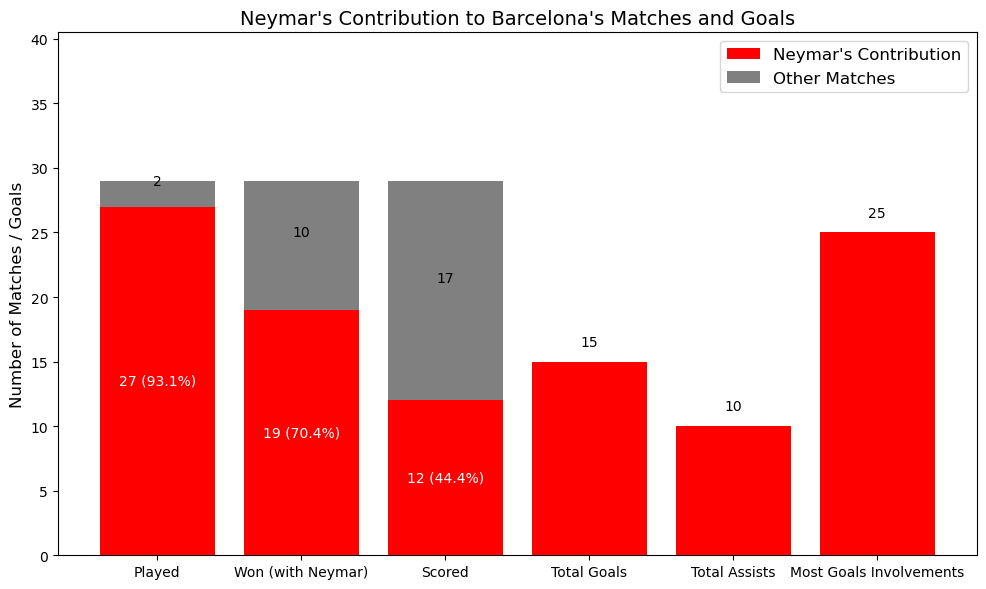

In [93]:
categories = ['Played', 'Won (with Neymar)', 'Scored', 'Total Goals', 'Total Assists', 'Most Goals Involvements']
values = [27, 19, 12, 15, 10, 25]
neymar_matches = 27
total_matches = 29  

remaining = [total_matches - v if i < 3 else 0 for i, v in enumerate(values)]

x = np.arange(len(categories)) 

plt.figure(figsize=(10, 6)) 

bars1 = plt.bar(x, values, label="Neymar's Contribution", color='red')
bars2 = plt.bar(x[:3], remaining[:3], bottom=values[:3], label="Other Matches", color='grey')

for i in range(len(categories)):
    if i == 0:  # First bar ("Played") should be divided by total_matches
        plt.text(x[i], values[i] / 2, 
                 f'{values[i]} ({values[i] / total_matches * 100:.1f}%)', 
                 ha='center', va='center', color='white', fontsize=10)

        plt.text(x[i], values[i] + remaining[i] / 2 + 1,
                 f'{remaining[i]}', ha='center', va='center', color='black', fontsize=10)  # Only number, no percentage

    elif i < 3:  # The next two bars ("Won with Neymar" and "Scored") should be divided by Neymar's matches (27)
        plt.text(x[i], values[i] / 2, 
                 f'{values[i]} ({values[i] / values[0] * 100:.1f}%)', 
                 ha='center', va='center', color='white', fontsize=10)

        plt.text(x[i], values[i] + remaining[i] / 2 + 1,
                 f'{remaining[i]}', ha='center', va='center', color='black', fontsize=10)  # Only number, no percentage

    else:  # The remaining bars (Total Goals, Assists, Goal Involvements) only display absolute values
        plt.text(x[i], values[i] + 1,  
                 f'{values[i]}', ha='center', va='bottom', color='black', fontsize=10)


plt.title("Neymar's Contribution to Barcelona's Matches and Goals", fontsize=14)
plt.ylabel("Number of Matches / Goals", fontsize=12)
plt.xticks(x, categories, fontsize=10)
plt.ylim(0, max(values) * 1.5) 
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Neymar's Performance Analysis at PSG

In [72]:
neymar_psg = cl_games[
    (cl_games['player_name'] == 'Neymar') &
    (cl_games['player_club_id'].isin([583]))]
neymar_psg

appearance_id  game_id  player_id  player_club_id  \
7983   2917360_68290  2917360      68290             583   
8455   2917383_68290  2917383      68290             583   
8787   2917391_68290  2917391      68290             583   
8957   2917407_68290  2917407      68290             583   
9481   2917424_68290  2917424      68290             583   
9620   2917439_68290  2917439      68290             583   
9979   2981997_68290  2981997      68290             583   
10775  3097960_68290  3097960      68290             583   
11650  3097999_68290  3097999      68290             583   
11844  3098016_68290  3098016      68290             583   
12374  3098031_68290  3098031      68290             583   
14972  3252219_68290  3252219      68290             583   
15471  3252243_68290  3252243      68290             583   
15606  3291927_68290  3291927      68290             583   
15880  3291935_68290  3291935      68290             583   
16053  3395237_68290  3395237      68290             583   
16171  3418065_68290  3418065      68290             583   
16234  3421017_68290  3421017      68290             583   
16409  3461724_68290  3461724      68290             583   
17020  3461747_68290  3461747      68290             583   
17649  3461779_68290  3461779      68290             583   
18291  3461791_68290  3461791      68290             583   
18683  3461822_68290  3461822      68290             583   
19304  3537801_68290  3537801      68290             583   
19360  3537805_68290  3537805      68290             583   
19469  3552988_68290  3552988      68290             583   
19497  3552989_68290  3552989      68290             583   
19764  3651038_68290  3651038      68290             583   
19946  3651061_68290  3651061      68290             583   
20846  3651102_68290  3651102      68290             583   
21167  3651117_68290  3651117      68290             583   
21772  3714221_68290  3714221      68290             583   
22006  3714229_68290  3714229      68290             583   
22669  3913702_68290  3913702      68290             583   
23637  3913727_68290  3913727      68290             583   
23819  3913739_68290  3913739      68290             583   
24827  3956699_68290  3956699      68290             583   

       player_current_club_id appearance_date player_name competition_id  \
7983                      583      2017-09-12      Neymar             CL   
8455                      583      2017-09-27      Neymar             CL   
8787                      583      2017-10-18      Neymar             CL   
8957                      583      2017-10-31      Neymar             CL   
9481                      583      2017-11-22      Neymar             CL   
9620                      583      2017-12-05      Neymar             CL   
9979                      583      2018-02-14      Neymar             CL   
10775                     583      2018-09-18      Neymar             CL   
11650                     583      2018-10-24      Neymar             CL   
11844                     583      2018-11-06      Neymar             CL   
12374                     583      2018-11-28      Neymar             CL   
14972                     583      2019-11-26      Neymar             CL   
15471                     583      2019-12-11      Neymar             CL   
15606                     583      2020-02-18      Neymar             CL   
15880                     583      2020-03-11      Neymar             CL   
16053                     583      2020-08-12      Neymar             CL   
16171                     583      2020-08-18      Neymar             CL   
16234                     583      2020-08-23      Neymar             CL   
16409                     583      2020-10-20      Neymar             CL   
17020                     583      2020-10-28      Neymar             CL   
17649                     583      2020-11-24      Neymar             CL   
18291                     583      2020-12-02      Ney

In [75]:
neymar_psg['goals'].sum()

16

In [78]:
neymar_psg['assists'].sum()

15

In [79]:
neymar_psg['Most Goal Involvements'] = neymar_psg['goals'] + neymar_psg['assists']
neymar_psg['Most Goal Involvements'].sum()

C:\Users\joaop\AppData\Local\Temp\ipykernel_13788\2185037458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neymar_psg['Most Goal Involvements'] = neymar_psg['goals'] + neymar_psg['assists']


31

In [80]:
neymarpsg_matches_count = neymar_psg.shape[0]
neymarpsg_matches_count

37

In [83]:
neymarpsg_wins = neymar_psg[
    ((neymar_psg['home_club_id'] == neymar_psg['player_club_id']) & 
     (neymar_psg['home_club_goals'] > neymar_psg['away_club_goals'])) |
    ((neymar_psg['away_club_id'] == neymar_psg['player_club_id']) & 
     (neymar_psg['away_club_goals'] > neymar_psg['home_club_goals']))]

neymarpsg_wins_count = neymarpsg_wins.shape[0]
neymarpsg_wins_count

18

In [85]:
neymar_goals_psg = cl_games[
    (cl_games['player_name'] == 'Neymar') &
    (cl_games['player_club_id'] == 583) &
    (cl_games['goals'] > 0)
]

neymarpsg_scored_matches_count = neymar_goals_psg['match_date'].nunique()
neymarpsg_scored_matches_count

12

In [86]:
psg_matches = cl_games[
    ((cl_games['home_club_name'] == 'Paris Saint-Germain') | (cl_games['away_club_name'] == 'Paris Saint-Germain')) &
    (cl_games['match_date'] >= '2017-09-12') & (cl_games['match_date'] <= '2023-02-14')
]

psg_matches_count = psg_matches['match_date'].nunique()
psg_matches_count

50

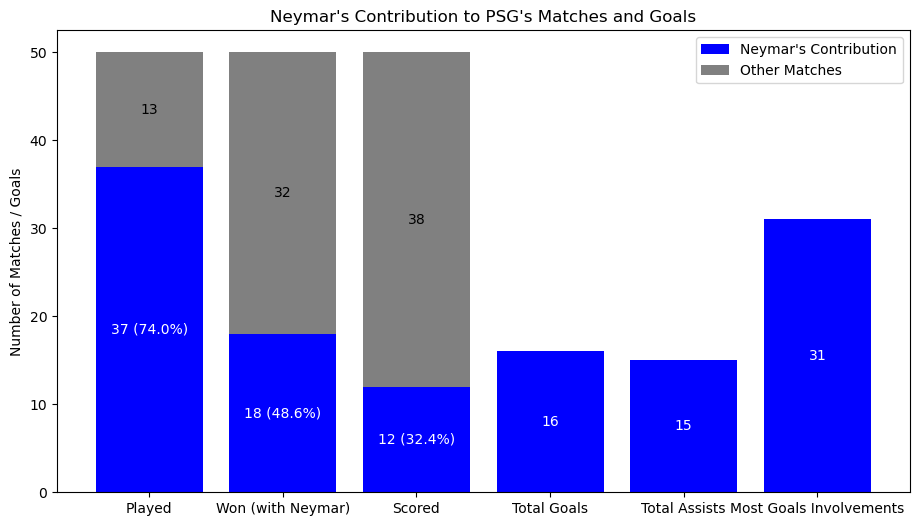

In [104]:
categories = ['Played', 'Won (with Neymar)', 'Scored', 'Total Goals', 'Total Assists', 'Most Goals Involvements']
values = [37, 18, 12, 16, 15, 31]  
neymar_psg = 37
total_matches = 50  

remaining = [total_matches - v if i < 3 else 0 for i, v in enumerate(values)]  

x = np.arange(len(categories))  

plt.figure(figsize=(11, 6))

bars1 = plt.bar(x, values, label="Neymar's Contribution", color='blue')
bars2 = plt.bar(x[:3], remaining[:3], bottom=values[:3], label="Other Matches", color='grey')  

for i in range(len(categories)):
    if i == 0:  # First bar ("Played") - Divide by total matches (50)
        plt.text(x[i], values[i] / 2,  
                 f'{values[i]} ({values[i] / total_matches * 100:.1f}%)', 
                 ha='center', va='center', color='white', fontsize=10)

        plt.text(x[i], values[i] + remaining[i] / 2,  
                 f'{remaining[i]}', ha='center', va='center', color='black', fontsize=10)  # Only number, no percentage

    elif i < 3:  # "Won with Neymar" and "Scored" - Divide by Neymar's matches (37)
        plt.text(x[i], values[i] / 2,  
                 f'{values[i]} ({values[i] / neymar_psg * 100:.1f}%)', 
                 ha='center', va='center', color='white', fontsize=10)

        plt.text(x[i], values[i] + remaining[i] / 2,  
                 f'{remaining[i]}', ha='center', va='center', color='black', fontsize=10)  # Only number, no percentage

    else:  # "Total Goals", "Total Assists", "Most Goals Involvements" - Only the number inside the bar
        plt.text(x[i], values[i] / 2,  
                 f'{values[i]}',  
                 ha='center', va='center', color='white', fontsize=10)

plt.title("Neymar's Contribution to PSG's Matches and Goals")
plt.ylabel("Number of Matches / Goals")
plt.xticks(x, categories)
plt.legend()
plt.show()

### Brazilian Players Performance Analysis (Champions League)

In [92]:
# Champions League appearances with Brazilians
br_games = cl_games[cl_games['nationality'] == 'Brazil']
br_games

appearance_id  game_id  player_id  player_club_id  \
13      2490842_33357  2490842      33357              13   
35     2490846_225335  2490846     225335             162   
36     2490846_225693  2490846     225693             162   
56     2490847_122946  2490847     122946             294   
58      2490847_13230  2490847      13230             294   
...               ...      ...        ...             ...   
25283  4041602_238223  4041602     238223             281   
25308   4041600_29241  4041600      29241             631   
25317  4041600_371998  4041600     371998             418   
25318  4041600_401530  4041600     401530             418   
25319  4041600_412363  4041600     412363             418   

       player_current_club_id appearance_date      player_name competition_id  \
13                         46      2014-09-16          Miranda             CL   
35                      19789      2014-09-16          Wallace             CL   
36                         31      2014-09-16          Fabinho             CL   
56                        294      2014-09-16           Jardel             CL   
58                        294      2014-09-16           Luisão             CL   
...                       ...             ...              ...            ...   
25283                     281      2023-04-11          Ederson             CL   
25308                     631      2023-04-12     Thiago Silva             CL   
25317                     418      2023-04-12  Vinicius Junior             CL   
25318                     418      2023-04-12     Éder Militão             CL   
25319                     418      2023-04-12          Rodrygo             CL   

       yellow_cards  red_cards  ...  season                   round  \
13                0          0  ...    2014                 Group A   
35                0          0  ...    2014                 Group C   
36                0          0  ...    2014                 Group C   
56                0          0  ...    2014                 Group C   
58                0          0  ...    2014                 Group C   
...             ...        ...  ...     ...                     ...   
25283             0          0  ...    2022  Quarter-Finals 1st leg   
25308             0          0  ...    2022  Quarter-Finals 1st leg   
25317             0          0  ...    2022  Quarter-Finals 1st leg   
25318             1          0  ...    2022  Quarter-Finals 1st leg   
25319             0          0  ...    2022  Quarter-Finals 1st leg   

       match_date  home_club_id away_club_id home_club_goals  away_club_goals  \
13     2014-09-16           683           13               3                2   
35     2014-09-16           162           15               1                0   
36     2014-09-16           162           15               1                0   
56     2014-09-16           294          964               0                2   
58     2014-09-16           294          964               0                2   
...           ...           ...          ...             ...              ...   
25283  2023-04-11           281           27               3                0   
25308  2023-04-12           418          631               2                0   
25317  2023-04-12           418          631               2                0   
25318  2023-04-12           418          631               2                0   
25319  2023-04-12           418          631               2                0   

           home_club_name        away_club_name  nationality  
13     Olympiacos Piraeus    Atlético de Madrid       Brazil  
35              AS Monaco   Bayer 04 Leverkusen       Brazil  
36              AS Monaco   Bayer 04 Leverkusen       Brazil  
56             SL Benfica  Zenit St. Petersburg       Brazil  
58             SL Benfica  Zenit St. Petersburg       Brazil  
...                   ...                   ...          ...  
25283     Manchester City         B

In [94]:
# Total matches played with Brazilian players
unique_brazilian_matches = br_games['game_id'].nunique()
unique_brazilian_matches

814

In [95]:
br_games_wins = br_games[
    ((br_games['home_club_id'] == br_games['player_club_id']) & 
     (br_games['home_club_goals'] > br_games['away_club_goals'])) |
    ((br_games['away_club_id'] == br_games['player_club_id']) & 
     (br_games['away_club_goals'] > br_games['home_club_goals']))
]

# Total matches won with Brazilians
br_games_wins_count = br_games_wins['game_id'].nunique()
br_games_wins_count

529

In [98]:
matches_with_brazilian_goals = br_games[br_games['goals'] > 0]

# Total matches where Brazilians scored
brazilian_scored_matches_count = matches_with_brazilian_goals['game_id'].nunique()
brazilian_scored_matches_count

185

In [99]:
# Total goals scored by Brazilians
total_goals_by_brazilian_players = br_games['goals'].sum()
total_goals_by_brazilian_players

247

In [101]:
# Total assists by Brazilians
total_assists_by_brazilian_players = br_games['assists'].sum()
total_assists_by_brazilian_players

204

In [102]:
br_games['Most Goal Involvements'] = br_games['goals'] + br_games['assists']
br_games['Most Goal Involvements'].sum()

C:\Users\joaop\AppData\Local\Temp\ipykernel_13788\1552082806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br_games['Most Goal Involvements'] = br_games['goals'] + br_games['assists']


451

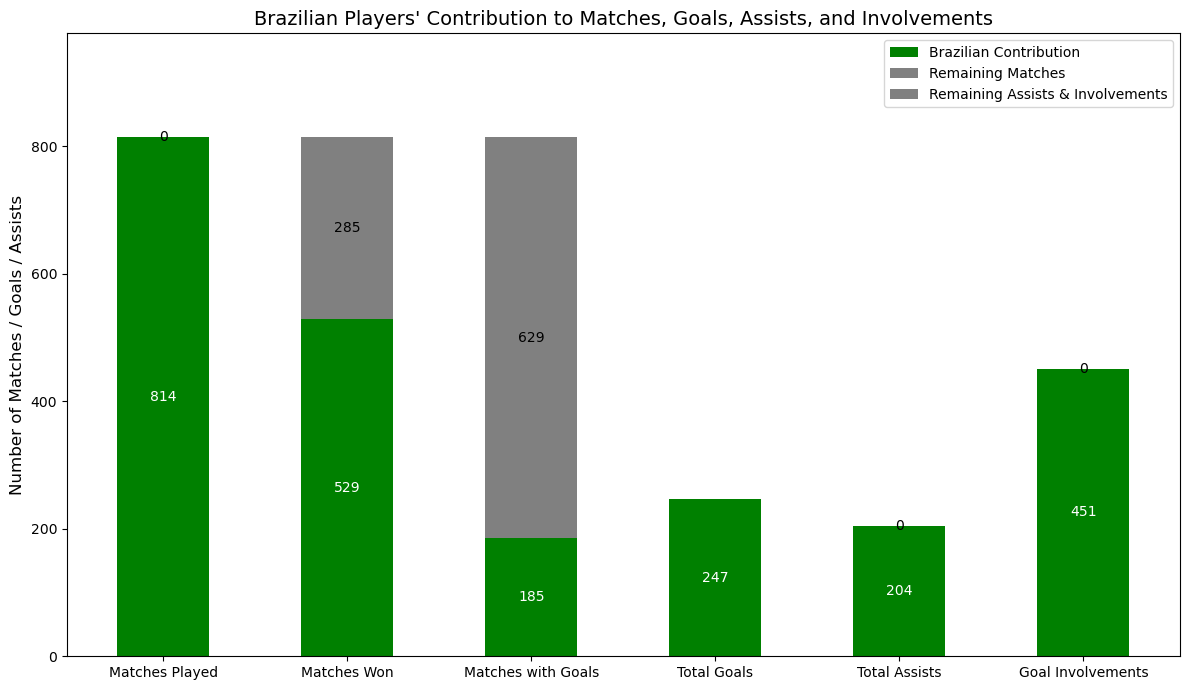

In [105]:
categories = ['Matches Played', 'Matches Won', 'Matches with Goals', 'Total Goals', 'Total Assists', 'Goal Involvements']
brazilian_values = [814, 529, 185, 247, 204, 451]  
total_matches = 814
total_goals = 247
total_assists = 204
goal_involvements = 451

remaining_values = [
    total_matches - brazilian_values[0],  
    total_matches - brazilian_values[1], 
    total_matches - brazilian_values[2], 
    0,
    total_assists - brazilian_values[4],
    goal_involvements - brazilian_values[5]  
]

x = np.arange(len(categories))
width = 0.5

plt.figure(figsize=(12, 7))

bars_brazilian = plt.bar(x, brazilian_values, label="Brazilian Contribution", color='green', width=width)

bars_remaining = plt.bar(x[:3], remaining_values[:3], bottom=brazilian_values[:3], label="Remaining Matches", color='grey', width=width)
bars_remaining_assists = plt.bar(x[4:], remaining_values[4:], bottom=brazilian_values[4:], label="Remaining Assists & Involvements", color='grey', width=width)

for i in range(len(categories)):
    plt.text(x[i], brazilian_values[i] / 2,  
             f'{brazilian_values[i]}', ha='center', va='center', color='white', fontsize=10)
    
    if i < 3: 
        plt.text(x[i], brazilian_values[i] + remaining_values[i] / 2,  
                 f'{remaining_values[i]}', ha='center', va='center', color='black', fontsize=10)
    elif i >= 4:  # For assists and goal involvements
        plt.text(x[i], brazilian_values[i] + remaining_values[i] / 2,  
                 f'{remaining_values[i]}', ha='center', va='center', color='black', fontsize=10)

plt.title("Brazilian Players' Contribution to Matches, Goals, Assists, and Involvements", fontsize=14)
plt.ylabel("Number of Matches / Goals / Assists", fontsize=12)
plt.xticks(x, categories, fontsize=10)
plt.ylim(0, max(brazilian_values) * 1.2) 
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

### Brazilian Players CL Stats

In [109]:
unique_brazilian_matches = 814  
br_games_wins_count = 529 
brazilian_scored_matches_count = 185 
total_goals_by_brazilian_players = 247  
total_goal_involvements = 451  


players_stats = {
    "player_name": ["Brazilians Players"],
    "goals": [total_goals_by_brazilian_players],
    "assists": [total_goal_involvements - total_goals_by_brazilian_players],
    "Most Goal Involvements": [total_goal_involvements],
    "Matches Played": [unique_brazilian_matches],
    "Goal Ratio (%)": [(total_goals_by_brazilian_players / unique_brazilian_matches) * 100],
    "Assist Ratio (%)": [((total_goal_involvements - total_goals_by_brazilian_players) / unique_brazilian_matches) * 100],
    "Goal Involvement Ratio (%)": [(total_goal_involvements / unique_brazilian_matches) * 100],
    "Matches Won Ratio (%)": [(br_games_wins_count / unique_brazilian_matches) * 100],
}

players_stats

players_stats_df = pd.DataFrame(players_stats)
players_stats_df

player_name  goals  assists  Most Goal Involvements  Matches Played  \
0  Brazilians Players    247      204                     451             814   

   Goal Ratio (%)  Assist Ratio (%)  Goal Involvement Ratio (%)  \
0        30.34398         25.061425                   55.405405   

   Matches Won Ratio (%)  
0              64.987715

##### Brazilian Ranking of Most Goals Involvements

In [112]:
most_goal_involvements = br_games.groupby("player_name")["Most Goal Involvements"].sum().sort_values(ascending=False)
most_goal_involvements.head(30)

player_name
Neymar               56
Roberto Firmino      29
Vinicius Junior      28
Rodrygo              21
Gabriel Jesus        20
Marcelo              16
Philippe Coutinho    15
Dani Alves           13
Douglas Costa        11
Alex Telles          10
Hulk                 10
David Neres          10
Willian               9
Lucas Moura           9
Casemiro              9
Talisca               8
Fernandinho           8
Antony                7
Rafinha               7
Alex Sandro           7
Fabinho               7
Marquinhos            7
Ismaily               6
Jonas                 5
Galeno                5
Fernando              5
Felipe                5
Taison                5
Bernard               5
Éder Militão          4
Name: Most Goal Involvements, dtype: int64

##### Top 10 Brazilians in the Champions League

In [115]:
top_stats = (
    br_games.groupby("player_name")[["goals", "assists"]]
    .sum())

matches_played = br_games.groupby("player_name")["game_id"].nunique()


top_stats["Most Goal Involvements"] = top_stats["goals"] + top_stats["assists"]
top_stats["Matches Played"] = matches_played


top_stats["Goal Ratio (%)"] = (top_stats["goals"] / top_stats["Matches Played"]) * 100
top_stats["Assist Ratio (%)"] = (top_stats["assists"] / top_stats["Matches Played"]) * 100
top_stats["Goal Involvement Ratio (%)"] = (top_stats["Most Goal Involvements"] / top_stats["Matches Played"]) * 100

top_10_stats = top_stats.sort_values(by="Most Goal Involvements", ascending=False).head(10)

top_10_stats

goals  assists  Most Goal Involvements  Matches Played  \
player_name                                                                 
Neymar                31       25                      56              64   
Roberto Firmino       19       10                      29              51   
Vinicius Junior       14       14                      28              40   
Rodrygo               13        8                      21              34   
Gabriel Jesus         16        4                      20              35   
Marcelo                4       12                      16              71   
Philippe Coutinho     10        5                      15              32   
Dani Alves             4        9                      13              37   
Douglas Costa          4        7                      11              40   
Alex Telles            3        7                      10              43   

                   Goal Ratio (%)  Assist Ratio (%)  \
player_name                                           
Neymar                  48.437500         39.062500   
Roberto Firmino         37.254902         19.607843   
Vinicius Junior         35.000000         35.000000   
Rodrygo                 38.235294         23.529412   
Gabriel Jesus           45.714286         11.428571   
Marcelo                  5.633803         16.901408   
Philippe Coutinho       31.250000         15.625000   
Dani Alves              10.810811         24.324324   
Douglas Costa           10.000000         17.500000   
Alex Telles              6.976744         16.279070   

                   Goal Involvement Ratio (%)  
player_name                                    
Neymar                              87.500000  
Roberto Firmino                     56.862745  
Vinicius Junior                     70.000000  
Rodrygo                             61.764706  
Gabriel Jesus                       57.142857  
Marcelo                             22.535211  
Philippe Coutinho                   46.875000  
Dani Alves                          35.135135  
Douglas Costa                       27.500000  
Alex Telles                         23.255814

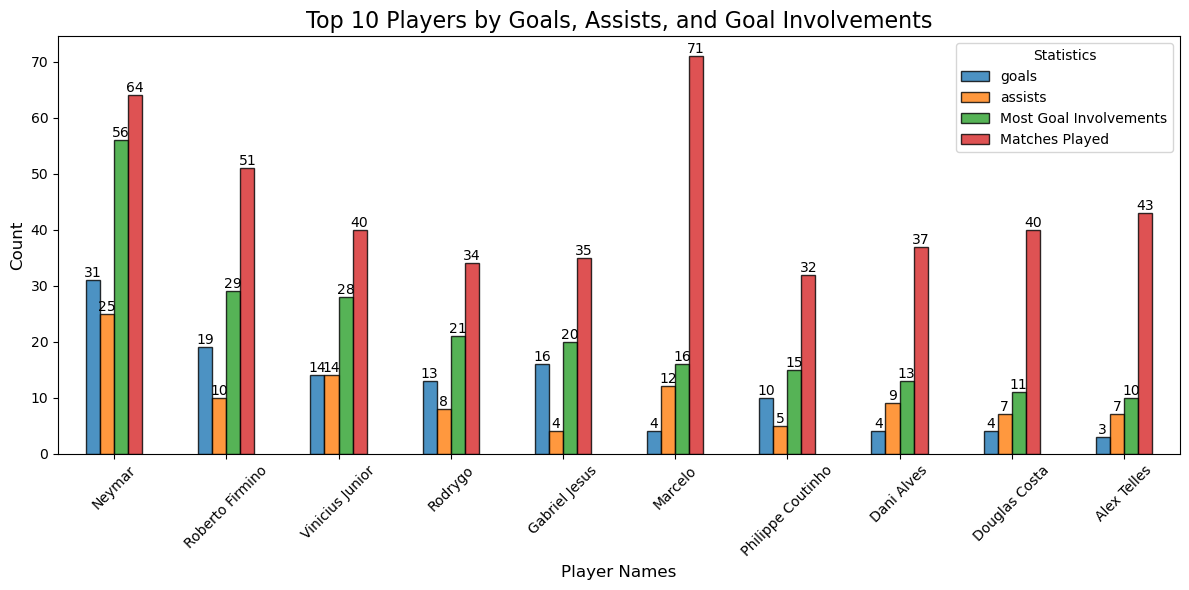

In [117]:
top_10_stats.plot(
    kind="bar", edgecolor='black',
    figsize=(12, 6),
    y=["goals", "assists", "Most Goal Involvements", "Matches Played"],
    stacked=False,
    alpha=0.8,
)

plt.title("Top 10 Players by Goals, Assists, and Goal Involvements", fontsize=16)
plt.xlabel("Player Names", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Statistics", loc="upper right")

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', label_type='edge')

plt.tight_layout()
plt.show()

### Market Value Analysis of Brazilians and Foreign Players

In [120]:
players_df

player_id       date    dateweek  market_value_in_eur_x  \
0            3132 2003-12-09  2003-12-08                 400000   
1            3132 2004-10-04  2004-10-04                2000000   
2            3132 2007-10-04  2007-10-01                2200000   
3            3132 2008-05-04  2008-04-28                2800000   
4            3132 2008-10-09  2008-10-06                1500000   
...           ...        ...         ...                    ...   
424318     936824 2023-04-07  2023-04-03                  10000   
424319     865414 2023-04-13  2023-04-10                  50000   
424320     731466 2023-05-15  2023-05-15                 300000   
424321     741236 2023-05-15  2023-05-15                 500000   
424322     863829 2023-05-17  2023-05-15                 100000   

               player_name  last_season  club_id nationality date_of_birth  \
0            Florin Cernat         2013      126     Romania    1980-03-10   
1            Florin Cernat         2013      126     Romania    1980-03-10   
2            Florin Cernat         2013      126     Romania    1980-03-10   
3            Florin Cernat         2013      126     Romania    1980-03-10   
4            Florin Cernat         2013      126     Romania    1980-03-10   
...                    ...          ...      ...         ...           ...   
424318         Maksym Zhuk         2021     6993     Ukraine    2003-08-18   
424319       Kirill Glebov         2022     2410      Russia    2005-11-10   
424320  Teddy Sharman-Lowe         2021      631     England    2003-03-30   
424321         Matthew Cox         2022     1148     England    2003-05-02   
424322        Alagie Saine         2022     2414  The Gambia    2003-01-20   

          position   foot  market_value_in_eur  highest_market_value_in_eur  \
0         Midfield   left                  NaN                    2800000.0   
1         Midfield   left                  NaN                    2800000.0   
2         Midfield   left                  NaN                    2800000.0   
3         Midfield   left                  NaN                    2800000.0   
4         Midfield   left                  NaN                    2800000.0   
...            ...    ...                  ...                          ...   
424318  Goalkeeper    NaN              10000.0                      10000.0   
424319      Attack  right              50000.0                      50000.0   
424320  Goalkeeper  right             300000.0                     300000.0   
424321  Goalkeeper    NaN             500000.0                     500000.0   
424322    Defender  right             100000.0                     100000.0   

           club_name  year   Age competition_id            name country_name  
0                NaN  2003  45.0            NaN             NaN          NaN  
1                NaN  2004  45.0            NaN             NaN          NaN  
2                NaN  2007  45.0            NaN             NaN          NaN  
3                NaN  2008  45.0            NaN             NaN          NaN  
4                NaN  2008  45.0            NaN             NaN          NaN  
...              ...   ...   ...            ...             ...          ...  
424318           NaN  2023  22.0            NaN             NaN          NaN  
424319   CSKA Moscow  2023  20.0            RU1    premier-liga       Russia  
424320    Chelsea FC  2023  22.0            GB1  premier-league      England  
424321  Brentford FC  2023  22.0            GB1  premier-league      England  
424322    AC Horsens  2023  22.0            DK1     superligaen      Denmark  

[424323 rows x 19 columns]

#### Seasonal Trends in Top Football Players' Market Values (2004–2022)

In [123]:
players_max_value = players_df.groupby(['player_name', 'year'])['market_value_in_eur_x'].max().reset_index()

players_max_value_filtered = players_max_value[players_max_value['year'].isin(range(2004, 2023))]

top_10_players = players_max_value_filtered.groupby('year').apply(lambda x: x.nlargest(10, 'market_value_in_eur_x')).reset_index(drop=True)
top_10_players['market_value_in_eur_x'] = top_10_players['market_value_in_eur_x'].apply(lambda x: f"€{x / 1e6:.2f}M")

top_10_players['market_value_numeric'] = (
    top_10_players['market_value_in_eur_x']
    .str.replace('€', '', regex=False) 
    .str.replace('M', '', regex=False)  
    .astype(float) * 1e6  
)

for year in top_10_players['year'].unique():
    print(f"Top 10 Players for {year}:")
    year_data = top_10_players[top_10_players['year'] == year]
    print(year_data[['player_name', 'market_value_in_eur_x']])
    print("\n" + "-"*50 + "\n")

Top 10 Players for 2004:
          player_name market_value_in_eur_x
0       David Beckham               €40.00M
1        Wayne Rooney               €37.00M
2     Francesco Totti               €35.00M
3  José Antonio Reyes               €35.00M
4       Didier Drogba               €30.00M
5        Michael Owen               €30.00M
6    Ricardo Carvalho               €30.00M
7        Samuel Eto'o               €27.00M
8                Kaká               €26.00M
9     Antonio Cassano               €25.00M

--------------------------------------------------

Top 10 Players for 2005:
              player_name market_value_in_eur_x
10         Michael Essien               €38.00M
11           Wayne Rooney               €36.00M
12          Frank Lampard               €35.00M
13       Gianluigi Buffon               €35.00M
14  Shaun Wright-Phillips               €31.50M
15          Didier Drogba               €31.00M
16           Samuel Eto'o               €31.00M
17      Alberto Gilardino    

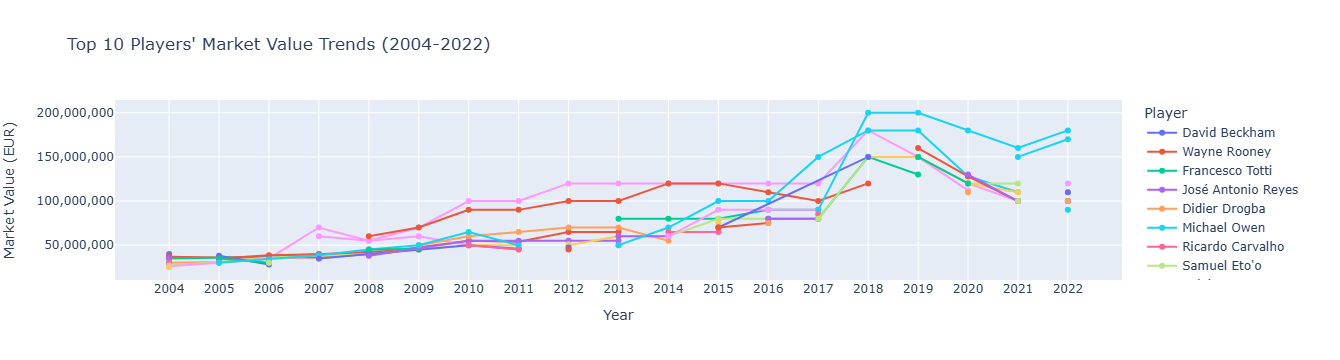

In [124]:
fig = px.line(
    top_10_players,
    x="year",
    y="market_value_numeric", 
    color="player_name",
    markers=True,
    title="Top 10 Players' Market Value Trends (2004-2022)",
    labels={"year": "Year", "market_value_numeric": "Market Value (EUR)", "player_name": "Player"},
    hover_data={"market_value_numeric": False, "market_value_in_eur_x": True}  
)

fig.update_layout(
    xaxis=dict(type="category", categoryorder="category ascending"),
    yaxis=dict(tickformat=",.0f", title="Market Value (EUR)")
)

fig.show()

#### Seasonal Trends in Top Brazilian Football Players' Market Values (2004–2022)

In [127]:
brazilian_players = players_df[players_df['nationality'] == 'Brazil']

brazilian_players_max = (
    brazilian_players.groupby(['player_name', 'year'], as_index=False)
    .agg({'market_value_in_eur_x': 'max'})  
)

brazilian_players_filtered = brazilian_players_max[
    brazilian_players_max['year'].isin(range(2004, 2023))  
]

top_10_brazilian_players = brazilian_players_filtered.groupby('year').apply(
    lambda x: x.nlargest(10, 'market_value_in_eur_x')
).reset_index(drop=True)
top_10_brazilian_players['market_value_in_eur_x'] = top_10_brazilian_players['market_value_in_eur_x'].apply(lambda x: f"€{x / 1e6:.2f}M")

top_10_brazilian_players['market_value_numeric'] = (
    top_10_brazilian_players['market_value_in_eur_x']
    .str.replace('€', '', regex=False)  
    .str.replace('M', '', regex=False)  
    .astype(float) * 1e6  
)

for year in top_10_brazilian_players['year'].unique():
    print(f"Top 10 Brazilian Players for {year}:")
    year_data = top_10_brazilian_players[top_10_brazilian_players['year'] == year]
    print(year_data[['player_name', 'market_value_in_eur_x']])
    print("\n" + "-"*50 + "\n")

Top 10 Brazilian Players for 2004:
      player_name market_value_in_eur_x
0            Kaká               €26.00M
1       Matuzalém               €14.00M
2           Lúcio               €13.00M
3            Alex               €10.00M
4           Diego               €10.00M
5         Robinho               €10.00M
6            Dedê                €9.50M
7  Júlio Baptista                €9.50M
8         Maxwell                €8.00M
9         Luciano                €7.00M

--------------------------------------------------

Top 10 Brazilian Players for 2005:
       player_name market_value_in_eur_x
10            Kaká               €30.00M
11  Júlio Baptista               €25.00M
12         Robinho               €25.00M
13           Lúcio               €23.50M
14           Diego               €13.00M
15          Luisão               €10.00M
16            Alex                €9.90M
17         Maxwell                €9.00M
18            Cris                €8.00M
19            Dedê         

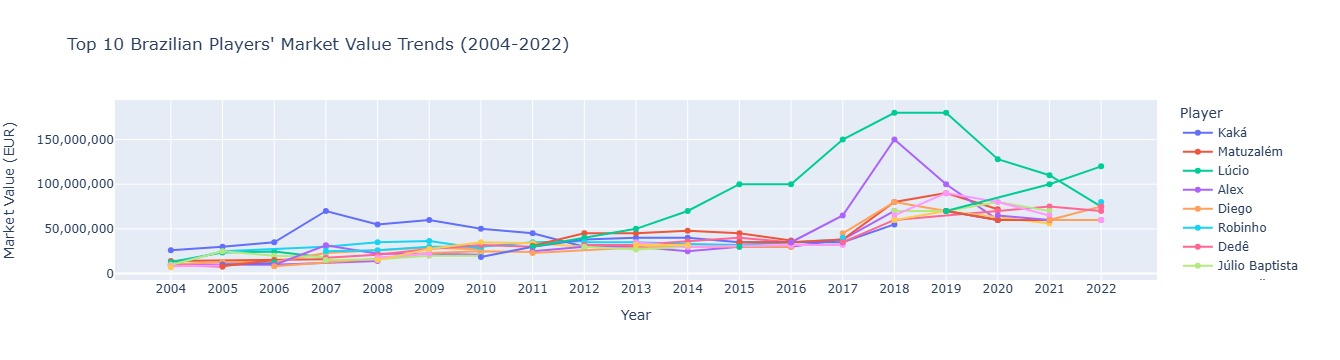

In [128]:
fig = px.line(
    top_10_brazilian_players,
    x="year",
    y="market_value_numeric",  
    color="player_name",  
    markers=True,  
    title="Top 10 Brazilian Players' Market Value Trends (2004-2022)",
    labels={
        "year": "Year",
        "market_value_numeric": "Market Value (EUR)",
        "player_name": "Player"
    },
    hover_data={"market_value_in_eur_x": True, "market_value_numeric": False}
)

fig.update_layout(
    xaxis=dict(
        type="category",  
        categoryorder="category ascending"  
    ),
    yaxis=dict(
        tickformat=",.0f",  
        title="Market Value (EUR)"
    )
)

fig.show()

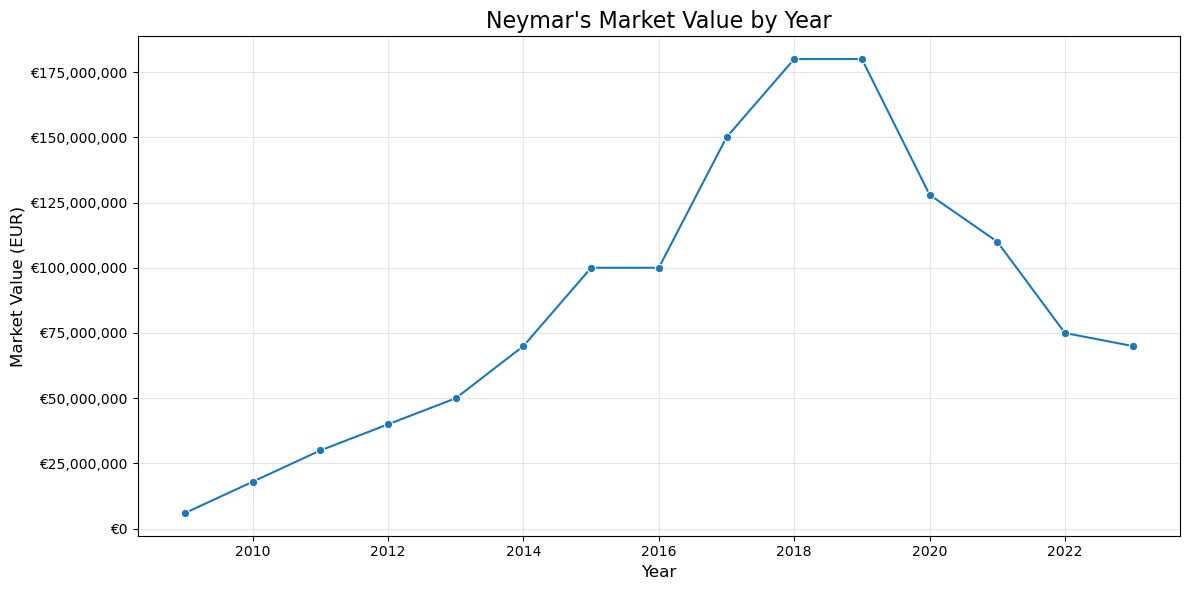

In [129]:
neymar_data = players_df[players_df['player_name'] == 'Neymar']

neymar_max_value = neymar_data.groupby('year')['market_value_in_eur_x'].max().reset_index()

def format_currency(value, tick_number):
    return f"€{value:,.0f}" 

plt.figure(figsize=(12, 6))
sns.lineplot(data=neymar_max_value, x='year', y='market_value_in_eur_x', marker='o')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

plt.title("Neymar's Market Value by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Market Value (EUR)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

##### Champions League Final Stats

In [131]:
final_matches = cl_games[cl_games['round'] == 'Final']

final_matches['winner'] = final_matches.apply(
    lambda row: row['home_club_name'] if row['home_club_goals'] > row['away_club_goals'] else (
        row['away_club_name'] if row['home_club_goals'] < row['away_club_goals'] else 'Draw'
    ), axis=1
)

unique_finals = final_matches.drop_duplicates(subset=['season'])

champions_by_year = unique_finals[['season', 'home_club_name', 'away_club_name', 'home_club_goals', 'away_club_goals', 'winner']]

champions_by_year = champions_by_year.sort_values(by='season')
champions_by_year

C:\Users\joaop\AppData\Local\Temp\ipykernel_13788\1205922728.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



season       home_club_name      away_club_name  home_club_goals  \
2431     2014          Juventus FC        FC Barcelona                1   
5043     2015          Real Madrid  Atlético de Madrid                6   
7876     2016          Juventus FC         Real Madrid                1   
10614    2017          Real Madrid        Liverpool FC                3   
13565    2018    Tottenham Hotspur        Liverpool FC                0   
16209    2019  Paris Saint-Germain       Bayern Munich                0   
19534    2020      Manchester City          Chelsea FC                0   
22492    2021         Liverpool FC         Real Madrid                0   

       away_club_goals         winner  
2431                 3   FC Barcelona  
5043                 4    Real Madrid  
7876                 4    Real Madrid  
10614                1    Real Madrid  
13565                2   Liverpool FC  
16209                1  Bayern Munich  
19534                1     Chelsea FC  
22492                1    Real Madrid

#### Merging All App and Games to analyze the impact on Player Market Value

In [139]:
merged_games_app_df = pd.merge(
    app,
    gamess,
    on="game_id", 
    how="inner"     
)

In [140]:
merged_games_app_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date_x', 'player_name', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'competition_id_y', 'season', 'round', 'date_y', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [141]:
merged_games_app_df

appearance_id  game_id  player_id  player_club_id  \
0        2460589_237947  2460589     237947           11411   
1        2460503_150846  2460503     150846            4807   
2        2460507_136142  2460507     136142             271   
3        2460508_153735  2460508     153735           18506   
4         2460509_27017  2460509      27017           10482   
...                 ...      ...        ...             ...   
1154303  3869240_701325  3869240     701325            2503   
1154304   3869240_71830  3869240      71830            6912   
1154305  3869240_739438  3869240     739438            6912   
1154306  3869240_818252  3869240     818252            2503   
1154307   3869240_95429  3869240      95429            6912   

         player_current_club_id      date_x       player_name  \
0                         16247  2014-07-01  Rumyan Hovsepyan   
1                          2503  2014-07-03           Yoro Ly   
2                           862  2014-07-03   Armando Vajushi   
3                          4128  2014-07-03  Marko Simonovski   
4                          3719  2014-07-03   Dmitriy Khomich   
...                         ...         ...               ...   
1154303                    2503  2023-04-17  Bruno Onyemaechi   
1154304                    6912  2023-04-17      Bruno Wilson   
1154305                    6912  2023-04-17   Matheus Pereira   
1154306                    2503  2023-04-17    Pedro Malheiro   
1154307                    6912  2023-04-17      Osama Rashid   

        competition_id_x  yellow_cards  red_cards  ...  \
0                    CLQ             0          0  ...   
1                    ELQ             0          0  ...   
2                    ELQ             0          0  ...   
3                    ELQ             0          0  ...   
4                    ELQ             0          0  ...   
...                  ...           ...        ...  ...   
1154303              PO1             0          0  ...   
1154304              PO1             0          0  ...   
1154305              PO1             0          0  ...   
1154306              PO1             0          0  ...   
1154307              PO1             1          0  ...   

         home_club_manager_name  away_club_manager_name  \
0              Richard Imbernón           Zsolt Hornyák   
1           Vardan Bichakhchyan          Viktor Kumykov   
2                Lilian Popescu        Krasimir Balakov   
3                  Emilio Gomez      Srgjan Zaharievski   
4                Vladimir Weiss              Agim Canaj   
...                         ...                     ...   
1154303                  Tulipa                   Petit   
1154304                  Tulipa                   Petit   
1154305                  Tulipa                   Petit   
1154306                  Tulipa                   Petit   
1154307                  Tulipa                   Petit   

                        stadium attendance             referee  \
0                Estadi Comunal      450.0           Jens Maae   
1           Gyumri City Stadium     2500.0  Yuriy Mozharovskyi   
2                     CSR Orhei     2400.0        Mitja Žganec   
3                Estadi Comunal      425.0       Tihomir Pejin   
4        Almaty Ortalyk Stadion    14000.0       Rahim Hasanov   
...                         ...        ...                 ...   
1154303       Estádio do Vizela        NaN     Hélder Carvalho   
1154304       Estádio do Vizela        NaN     Hélder Carvalho   
1154305       Estádio do Vizela        NaN     Hélder Carvalho   
1154306       Estádio do Vizela        NaN     Hélder Carvalho   
1154307       Estádio do Vizela        NaN     Hélder Carvalho   

                                                       url home_club_name  \
0        https://www.transfermarkt.co.uk/spielbericht/i...            NaN   
1        https://www.transfermarkt.co.uk/spielbericht/i...            NaN   
2        https://www.transfermarkt.co.uk/s

In [142]:
merged_games_app_df['Most Goal Involvements'] = merged_games_app_df['goals'] + merged_games_app_df['assists']
merged_games_app_df['Most Goal Involvements']

0          0
1          0
2          0
3          1
4          0
          ..
1154303    0
1154304    0
1154305    0
1154306    0
1154307    1
Name: Most Goal Involvements, Length: 1154308, dtype: int64

##### Top Players with the Most Goal Involvements in the Champions League

In [144]:
most_goal_involvements = merged_games_app_df.groupby("player_name")["Most Goal Involvements"].sum().sort_values(ascending=False)
most_goal_involvements.head(30)

player_name
Lionel Messi                 526
Robert Lewandowski           448
Cristiano Ronaldo            405
Luis Suárez                  358
Karim Benzema                322
Mohamed Salah                322
Neymar                       318
Harry Kane                   314
Thomas Müller                300
Kylian Mbappé                286
Pierre-Emerick Aubameyang    281
Ciro Immobile                271
Dusan Tadić                  270
Kevin De Bruyne              267
Antoine Griezmann            266
Romelu Lukaku                247
Wissam Ben Yedder            246
Heung-min Son                232
Raheem Sterling              229
Bruno Fernandes              228
Paulinho                     226
Alexandre Lacazette          225
Edin Dzeko                   221
Luuk de Jong                 220
Steven Berghuis              216
Dries Mertens                216
Hakim Ziyech                 216
Sergio Agüero                216
Sadio Mané                   214
Timo Werner                  21

##### Players with the top stats from 2014 to 2023 (All competitions)

In [146]:
top_all_games_stats = (
    merged_games_app_df.groupby("player_name")[["goals", "assists"]]
    .sum())

top_all_games_stats["Most Goal Involvements"] = top_all_games_stats["goals"] + top_all_games_stats["assists"]

top_10_all_games_stats = top_all_games_stats.sort_values(by="Most Goal Involvements", ascending=False).head(10)
top_10_all_games_stats

goals  assists  Most Goal Involvements
player_name                                               
Lionel Messi          341      185                     526
Robert Lewandowski    371       77                     448
Cristiano Ronaldo     323       82                     405
Luis Suárez           243      115                     358
Karim Benzema         230       92                     322
Mohamed Salah         227       95                     322
Neymar                197      121                     318
Harry Kane            258       56                     314
Thomas Müller         135      165                     300
Kylian Mbappé         196       90                     286

In [147]:
# Filtering Most goals involvements to merge into players DF in order to have better Market Value Analysis

merged_games_app_df = merged_games_app_df.drop(['appearance_id', 'game_id', 
       'player_club_id', 'player_current_club_id', 'date_x', 
       'player_name', 'competition_id_x','yellow_cards', 
       'red_cards', 'goals', 'assists', 'minutes_played',
       'competition_id_y', 'season', 'round', 'date_y', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',], axis=1)
merged_games_app_df

player_id  Most Goal Involvements
0           237947                       0
1           150846                       0
2           136142                       0
3           153735                       1
4            27017                       0
...            ...                     ...
1154303     701325                       0
1154304      71830                       0
1154305     739438                       0
1154306     818252                       0
1154307      95429                       1

[1154308 rows x 2 columns]

In [148]:
merged_games_app_df['Total Most Goal Involvements'] = merged_games_app_df.groupby('player_id')['Most Goal Involvements'].transform('sum')

In [149]:
unique_players = merged_games_app_df[['player_id', 'Total Most Goal Involvements']].drop_duplicates(subset='player_id')

In [151]:
players_df_final = players_df.merge(unique_players, on='player_id', how='left')

In [152]:
players_df_final.isnull().sum()

player_id                            0
date                                 0
dateweek                             0
market_value_in_eur_x                0
player_name                          0
last_season                          0
club_id                              0
nationality                          3
date_of_birth                      500
position                             0
foot                             12948
market_value_in_eur             134720
highest_market_value_in_eur          0
club_name                       138620
year                                 0
Age                                500
competition_id                  138620
name                            138620
country_name                    138620
Total Most Goal Involvements     88297
dtype: int64

In [155]:
# Player name df to match with predictions
players_name_df = players_df_final[['player_id', 'player_name']]
players_name_df = players_name_df.drop_duplicates()
players_name_df

player_id         player_name
0            3132       Florin Cernat
25           6893       Gabriel Tamas
55             10      Miroslav Klose
78             26  Roman Weidenfeller
105            65    Dimitar Berbatov
...           ...                 ...
424318     936824         Maksym Zhuk
424319     865414       Kirill Glebov
424320     731466  Teddy Sharman-Lowe
424321     741236         Matthew Cox
424322     863829        Alagie Saine

[27374 rows x 2 columns]

### Data Preprocessing for ML

In [159]:
players_df_final = players_df_final.drop(['date_of_birth', 'foot', 'market_value_in_eur', 'date', 'dateweek', 'year', 'player_name', 'competition_id', 'last_season'], axis=1)
players_df_final = players_df_final.rename(columns={'Total Most Goal Involvements': 'Total_Most_Goal_Involvements'})

age_mean = players_df_final['Age'].mean()
Total_Most_Goal_Involvements_median = players_df_final['Total_Most_Goal_Involvements'].median()

players_df_final.fillna({'Age': age_mean}, inplace=True)
players_df_final.fillna({'Total_Most_Goal_Involvements': Total_Most_Goal_Involvements_median}, inplace=True)
players_df_final = players_df_final.rename(columns={'name': 'League'})

league_name_mapping = {
    'serie-a': 'Serie A',
    'bundesliga': 'Bundesliga',
    'super-league-1': 'Super League 1',
    'premier-league': 'Premier League',
    'super-lig': 'Super Lig',
    'premier-liga': 'Primeira Liga',
    'laliga': 'La Liga',
    'superligaen': 'Superligaen',
    'scottish-premiership': 'Scottish Premiership',
    'eredivisie': 'Eredivisie',
    'ligue-1': 'Ligue 1',
    'jupiler-pro-league': 'Jupiler Pro League',
    'liga-portugal-bwin': 'Liga Portugal Bwin'
}
players_df_final['League'] = players_df_final['League'].replace(league_name_mapping)

In [163]:
players_df_final

player_id  market_value_in_eur_x  club_id nationality    position  \
0            3132                 400000      126     Romania    Midfield   
1            3132                2000000      126     Romania    Midfield   
2            3132                2200000      126     Romania    Midfield   
3            3132                2800000      126     Romania    Midfield   
4            3132                1500000      126     Romania    Midfield   
...           ...                    ...      ...         ...         ...   
424318     936824                  10000     6993     Ukraine  Goalkeeper   
424319     865414                  50000     2410      Russia      Attack   
424320     731466                 300000      631     England  Goalkeeper   
424321     741236                 500000     1148     England  Goalkeeper   
424322     863829                 100000     2414  The Gambia    Defender   

        highest_market_value_in_eur     club_name   Age          League  \
0                         2800000.0           NaN  45.0             NaN   
1                         2800000.0           NaN  45.0             NaN   
2                         2800000.0           NaN  45.0             NaN   
3                         2800000.0           NaN  45.0             NaN   
4                         2800000.0           NaN  45.0             NaN   
...                             ...           ...   ...             ...   
424318                      10000.0           NaN  22.0             NaN   
424319                      50000.0   CSKA Moscow  20.0   Primeira Liga   
424320                     300000.0    Chelsea FC  22.0  Premier League   
424321                     500000.0  Brentford FC  22.0  Premier League   
424322                     100000.0    AC Horsens  22.0     Superligaen   

       country_name  Total_Most_Goal_Involvements  league_prestige  \
0               NaN                           4.0              NaN   
1               NaN                           4.0              NaN   
2               NaN                           4.0              NaN   
3               NaN                           4.0              NaN   
4               NaN                           4.0              NaN   
...             ...                           ...              ...   
424318          NaN                           4.0              NaN   
424319       Russia                           4.0              0.4   
424320      England                           4.0              1.0   
424321      England                           4.0              1.0   
424322      Denmark                           4.0              0.5   

        club_prestige  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
424318            NaN  
424319          0.146  
424320          0.828  
424321          0.077  
424322          0.020  

[424323 rows x 13 columns]

In [174]:
players_df_final = players_df_final.dropna()
players_df_final

player_id  market_value_in_eur_x  club_id nationality    position  \
55             10                7000000      398     Germany      Attack   
56             10                9000000      398     Germany      Attack   
57             10               12000000      398     Germany      Attack   
58             10               15000000      398     Germany      Attack   
59             10               20000000      398     Germany      Attack   
...           ...                    ...      ...         ...         ...   
424317     714458                 100000     1003     England    Defender   
424319     865414                  50000     2410      Russia      Attack   
424320     731466                 300000      631     England  Goalkeeper   
424321     741236                 500000     1148     England  Goalkeeper   
424322     863829                 100000     2414  The Gambia    Defender   

        highest_market_value_in_eur       club_name   Age          League  \
55                       30000000.0        SS Lazio  47.0         Serie A   
56                       30000000.0        SS Lazio  47.0         Serie A   
57                       30000000.0        SS Lazio  47.0         Serie A   
58                       30000000.0        SS Lazio  47.0         Serie A   
59                       30000000.0        SS Lazio  47.0         Serie A   
...                             ...             ...   ...             ...   
424317                     100000.0  Leicester City  21.0  Premier League   
424319                      50000.0     CSKA Moscow  20.0   Primeira Liga   
424320                     300000.0      Chelsea FC  22.0  Premier League   
424321                     500000.0    Brentford FC  22.0  Premier League   
424322                     100000.0      AC Horsens  22.0     Superligaen   

       country_name  Total_Most_Goal_Involvements  league_prestige  \
55            Italy                          40.0              0.8   
56            Italy                          40.0              0.8   
57            Italy                          40.0              0.8   
58            Italy                          40.0              0.8   
59            Italy                          40.0              0.8   
...             ...                           ...              ...   
424317      England                           4.0              1.0   
424319       Russia                           4.0              0.4   
424320      England                           4.0              1.0   
424321      England                           4.0              1.0   
424322      Denmark                           4.0              0.5   

        club_prestige  
55              0.375  
56              0.375  
57              0.375  
58              0.375  
59              0.375  
...               ...  
424317          0.200  
424319          0.146  
424320          0.828  
424321          0.077  
424322          0.020  

[272274 rows x 13 columns]

In [175]:
players_df_final.isnull().sum()

player_id                       0
market_value_in_eur_x           0
club_id                         0
nationality                     0
position                        0
highest_market_value_in_eur     0
club_name                       0
Age                             0
League                          0
country_name                    0
Total_Most_Goal_Involvements    0
league_prestige                 0
club_prestige                   0
dtype: int64

In [176]:
players_df_final.duplicated().sum()

117349

In [177]:
players_df_final = players_df_final.drop_duplicates(subset=['player_id'], keep='first')

In [178]:
players_df_final

player_id  market_value_in_eur_x  club_id nationality    position  \
55             10                7000000      398     Germany      Attack   
78             26                1500000       16     Germany  Goalkeeper   
105            65                8000000     1091    Bulgaria      Attack   
133            77               13000000      506      Brazil    Defender   
155            80                 400000       27     Germany  Goalkeeper   
...           ...                    ...      ...         ...         ...   
424317     714458                 100000     1003     England    Defender   
424319     865414                  50000     2410      Russia      Attack   
424320     731466                 300000      631     England  Goalkeeper   
424321     741236                 500000     1148     England  Goalkeeper   
424322     863829                 100000     2414  The Gambia    Defender   

        highest_market_value_in_eur          club_name   Age          League  \
55                       30000000.0           SS Lazio  47.0         Serie A   
78                        8000000.0  Borussia Dortmund  45.0      Bundesliga   
105                      34500000.0  PAOK Thessaloniki  44.0  Super League 1   
133                      24500000.0        Juventus FC  47.0         Serie A   
155                       3000000.0      Bayern Munich  44.0      Bundesliga   
...                             ...                ...   ...             ...   
424317                     100000.0     Leicester City  21.0  Premier League   
424319                      50000.0        CSKA Moscow  20.0   Primeira Liga   
424320                     300000.0         Chelsea FC  22.0  Premier League   
424321                     500000.0       Brentford FC  22.0  Premier League   
424322                     100000.0         AC Horsens  22.0     Superligaen   

       country_name  Total_Most_Goal_Involvements  league_prestige  \
55            Italy                          40.0              0.8   
78          Germany                           0.0              0.8   
105          Greece                          15.0              0.4   
133           Italy                           4.0              0.8   
155         Germany                           0.0              0.8   
...             ...                           ...              ...   
424317      England                           4.0              1.0   
424319       Russia                           4.0              0.4   
424320      England                           4.0              1.0   
424321      England                           4.0              1.0   
424322      Denmark                           4.0              0.5   

        club_prestige  
55              0.375  
78              0.648  
105             0.209  
133             0.772  
155             0.840  
...               ...  
424317          0.200  
424319          0.146  
424320          0.828  
424321          0.077  
424322          0.020  

[17118 rows x 13 columns]

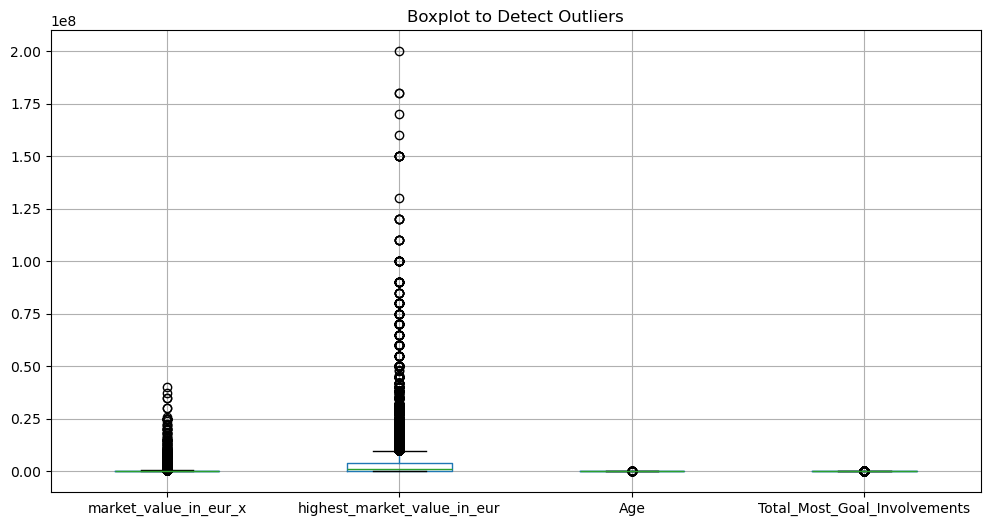

In [186]:
num_cols = ['market_value_in_eur_x', 'highest_market_value_in_eur', 'Age', 'Total_Most_Goal_Involvements']

plt.figure(figsize=(12, 6))
players_df_final[num_cols].boxplot()
plt.title("Boxplot to Detect Outliers")
plt.show()

### Encoding

In [188]:
players_df_final = players_df_final.drop(['club_name', 'player_id', 'country_name', 'League', 'position'], axis=1)

# Frequency Encoding
nationality_counts = players_df_final['nationality'].value_counts()
players_df_final['nationality_encoded'] = players_df_final['nationality'].map(nationality_counts)
players_df_final = players_df_final.drop(columns=['nationality'])

ordinal_encoder = OrdinalEncoder()
players_df_final[['league_prestige', 'club_prestige']] = ordinal_encoder.fit_transform(players_df_final[['league_prestige', 'club_prestige']])

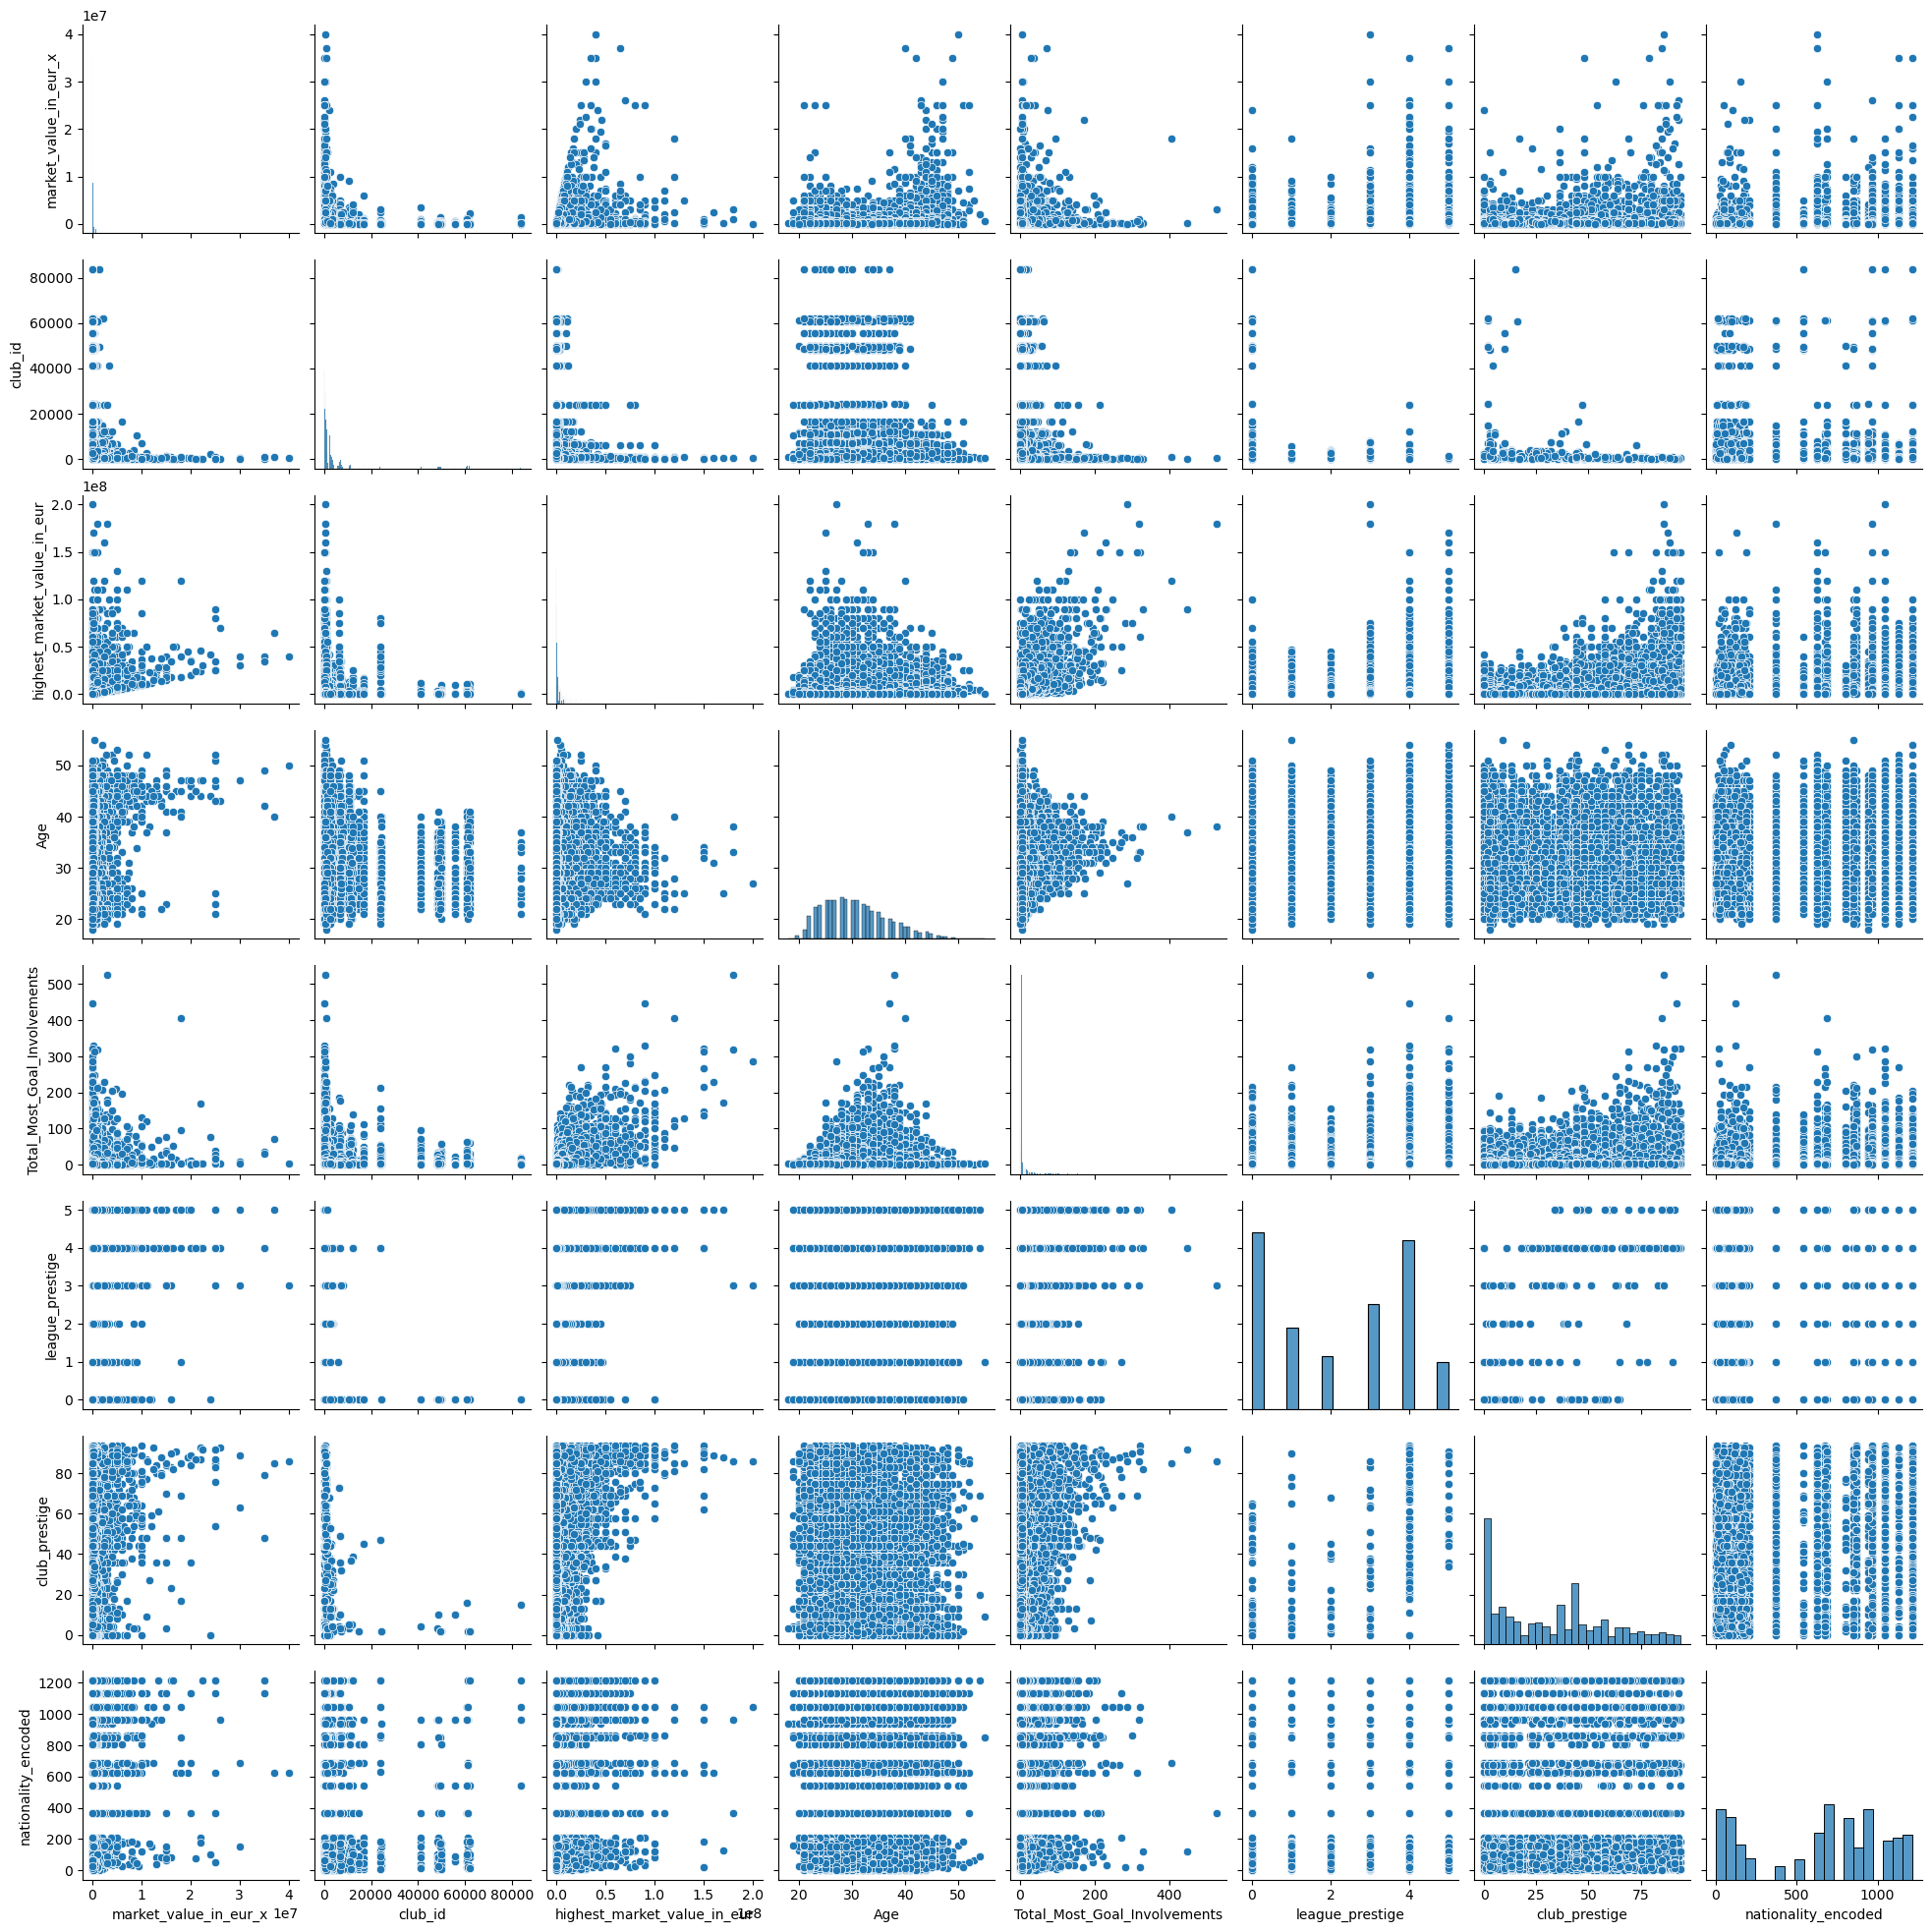

In [189]:
sns.pairplot(players_df_final)

In [192]:
players_df_final

market_value_in_eur_x  club_id  highest_market_value_in_eur   Age  \
55                    7000000      398                   30000000.0  47.0   
78                    1500000       16                    8000000.0  45.0   
105                   8000000     1091                   34500000.0  44.0   
133                  13000000      506                   24500000.0  47.0   
155                    400000       27                    3000000.0  44.0   
...                       ...      ...                          ...   ...   
424317                 100000     1003                     100000.0  21.0   
424319                  50000     2410                      50000.0  20.0   
424320                 300000      631                     300000.0  22.0   
424321                 500000     1148                     500000.0  22.0   
424322                 100000     2414                     100000.0  22.0   

        Total_Most_Goal_Involvements  league_prestige  club_prestige  \
55                              40.0              4.0           69.0   
78                               0.0              4.0           81.0   
105                             15.0              0.0           59.0   
133                              4.0              4.0           84.0   
155                              0.0              4.0           90.0   
...                              ...              ...            ...   
424317                           4.0              5.0           58.0   
424319                           4.0              0.0           53.0   
424320                           4.0              5.0           89.0   
424321                           4.0              5.0           34.0   
424322                           4.0              1.0           13.0   

        nationality_encoded  
55                      866  
78                      866  
105                      33  
133                     965  
155                     866  
...                     ...  
424317                  626  
424319                  805  
424320                  626  
424321                  626  
424322                   23  

[17118 rows x 8 columns]

In [198]:
# Splitting the data
y = players_df_final['market_value_in_eur_x']
X = players_df_final.drop('market_value_in_eur_x', axis=1)

Linear Regression Performance:
MAE: 482966.00146758836
RMSE: 1609493.8302030105
R² Score: 0.12250691550182824

Random Forest Performance:
MAE: 327129.65961401816
RMSE: 1262516.1926653364
R² Score: 0.46006810375561014
OOB Score: 0.5029660830656724


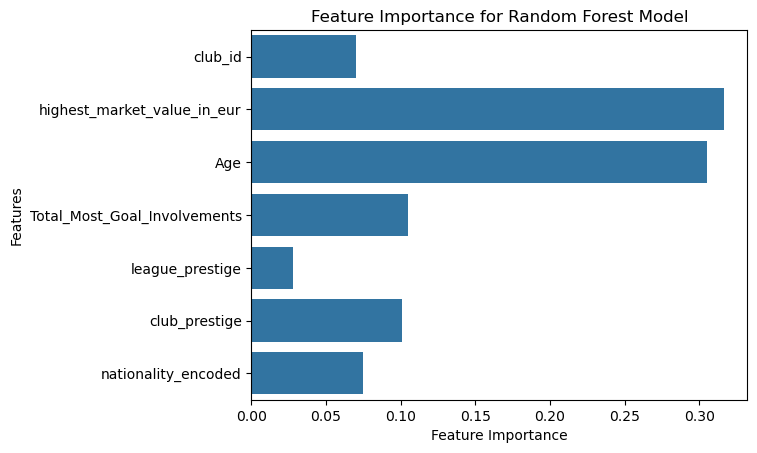

In [219]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Ensure test data is scaled properly

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Model Evaluation
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, max_features= 3, max_samples=None, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)  

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
print("\nRandom Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")
print(f"OOB Score: {rf_model.oob_score_}")

# Feature Importance Plot
sns.barplot(x=rf_model.feature_importances_, y=X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Random Forest Model")
plt.show()


In [202]:
predictions_df = pd.DataFrame({
    'Actual Market Value (EUR)': y_test.values,
    'Predicted Market Value (Linear Regression)': y_pred_lr,
    'Predicted Market Value (Random Forest)': y_pred_rf
})
predictions_df

Actual Market Value (EUR)  Predicted Market Value (Linear Regression)  \
0                         50000                               243046.356965   
1                        150000                               407835.874554   
2                        200000                               657483.319798   
3                        600000                                -4016.708811   
4                         50000                                13840.297401   
...                         ...                                         ...   
3419                     250000                               368096.562590   
3420                     100000                               657567.502909   
3421                     700000                               513399.766637   
3422                      50000                               710794.555600   
3423                      50000                               529752.257456   

      Predicted Market Value (Random Forest)  
0                                   189750.0  
1                                   121400.0  
2                                   402950.0  
3                                   155000.0  
4                                   123750.0  
...                                      ...  
3419                                 85250.0  
3420                                363250.0  
3421                                423000.0  
3422                                307750.0  
3423                                172750.0  

[3424 rows x 3 columns]

In [206]:
def format_currency(value):
    return f"€{value:,.0f}"

# Apply formatting to the relevant columns
predictions_df_formatted = predictions_df.copy()
predictions_df_formatted['Actual Market Value (EUR)'] = predictions_df_formatted['Actual Market Value (EUR)'].apply(format_currency)
predictions_df_formatted['Predicted Market Value (Linear Regression)'] = predictions_df_formatted['Predicted Market Value (Linear Regression)'].apply(format_currency)
predictions_df_formatted['Predicted Market Value (Random Forest)'] = predictions_df_formatted['Predicted Market Value (Random Forest)'].apply(format_currency)
predictions_df_formatted

Actual Market Value (EUR) Predicted Market Value (Linear Regression)  \
0                      €50,000                                   €243,046   
1                     €150,000                                   €407,836   
2                     €200,000                                   €657,483   
3                     €600,000                                    €-4,017   
4                      €50,000                                    €13,840   
...                        ...                                        ...   
3419                  €250,000                                   €368,097   
3420                  €100,000                                   €657,568   
3421                  €700,000                                   €513,400   
3422                   €50,000                                   €710,795   
3423                   €50,000                                   €529,752   

     Predicted Market Value (Random Forest)  
0                                  €189,750  
1                                  €121,400  
2                                  €402,950  
3                                  €155,000  
4                                  €123,750  
...                                     ...  
3419                                €85,250  
3420                               €363,250  
3421                               €423,000  
3422                               €307,750  
3423                               €172,750  

[3424 rows x 3 columns]

## Insights

**The Impact of Brazilian Players in the Champions League**

  After performing data cleaning and exploration, I found significant insights into Brazilian players' performances in the Champions League, which is the most prestigious club competition, as I had expected.
  
  Between 2014 and 2023, a total of 814 matches featured at least one Brazilian player. Of these matches, 529 were won by teams with Brazilian players (65%). Additionally, in 185 matches (22.7%), at least one Brazilian player scored a goal, contributing to a total of 247 goals, 204 assists, and 451 goal involvements. This is the impact of Brazilian players in Champions League matches. To better illustrate the real influence of Brazilian players, I also analyzed data on French players in the Champions League. French players were involved in 697 matches, of which 429 were won by teams with French players (61.5%). In 189 matches (27.1%), at least one French player scored a goal, contributing to a total of 261 goals, 169 assists, and 430 goal involvements. 
  
  Therefore, we see that the numbers are quite similar. Brazilian players only 'fall behind' in the number of matches won and total goals, and even then, by a small margin. The key point in this comparison is that, despite Brazilians playing more matches, France is the nation with the most players competing in the tournament—twice as many as Brazilian players, throughout the whole dataset's time period. Which is the reason i chose french players for this comparison. These results highlights the strength of Brazilian players and how coaches tend to prefer them. The reason is clear: their numbers show that they consistently deliver strong performances on the field.

**Top Brazilian Players and their Impact in the CL**

Another key highlight is the Top 10 Brazilian players in the Champions League based on their statistics: 1st - Neymar, 2nd - Roberto Firmino, 3rd - Vinícius Júnior, 4th - Rodrygo, 5th - Gabriel Jesus, 6th - Marcelo, 7th - Philippe Coutinho, 8th - Dani Alves, 9th - Douglas Costa, 10th - Alex Telles.

Analyzing this ranking, seven of them are forwards, which was expected. However, what stands out is that the remaining three are full-backs rather than midfielders—a position that typically accumulates better numbers in statistical rankings. That said, two of these full-backs, Marcelo and Dani Alves, are arguably among the best in the history of the tournament.

**The Best Brazilian Player and his impact in Champions League Matches**

As I mentioned in the previous finding, Neymar was the best Brazilian player in the Champions League over the period, but it’s necessary to illustrate his impact in the matches of the two clubs where he shone in the tournament.

During his time at Barcelona, Neymar played 27 out of the 29 matches the team had (93.1%), winning 19 of those matches with him on the field (65.5%). He scored at least one goal in 12 matches (41.4%), with a total of 15 goals, 10 assists, and 25 goal contributions, averaging 0.93, meaning almost one goal involvement per match.

After his transfer to Paris Saint-Germain, he continued his strong performance, although with a lower win rate in matches with him on the field. He played 37 out of 50 matches the team had in the Champions League (74%), winning 18 of those matches(48.6%). He scored at least one goal in 12 matches (32.4%), with a total of 16 goals, 10 assists, and 31 goal contributions, averaging 0.83 goals involvements per game. An average slightly below his performance at Barcelona, but with more goal contributions and more matches, which explains the difference in the averages. 

**Market Value Analysis of Brazilian and Foreign Players (Seasonal Trend)**

From the market value analyses, we can see a significant increase in these values, although it was expected. This demonstrates how player market values have been increasingly inflated in recent years and are expected to keep rising. We can also highlight the bigger gap between top players and average to weak players.

For instance, in 2007, the most valuable player was worth €70M, the brazilian player, Kaka. whereas today, the top player is valued at around €200M, the french player, Mbappe. Meanwhile, €70M now represents an average or good player.

Regarding the best Brazilian player, Neymar, the exponential increase in his market value is notable. He reached his highest market value in 2018 after being transferred to PSG and entering his prime. However, due to several injuries, limited matches played, and aging, Neymar's market value started to decline significantly.